# G2M insight for Cab Investment firm 

## Table of Content
1. [Business problem](#1)<br>
2. [Hypothesis](#2)
3. [Data Understanding and Preparation](#3)
4. [Exploratory Data Analysis](#4)
5. [Profit Analysis](#5)
6. [Demand Analysis](#6)
7. [Client Analysis](#7)
8. [Conclusion](#8)

<a id="1"></a> <br>
## 1. Business problem

The main purpose of this notebook is to understand the market before investing in the Cab industry according to Go-to-Market(G2M) strategy. Go-to-market strategies tend to focus on the short-term, but effective ones will also consider how any immediate success can be sustained over a longer period. 

<a id="2"></a> <br>
## 2. Hypothesis
 
1. How does the profit change over time?
2. How does the percentage of profitable trips change by the city?
3. How does the demand of the cab industry change over time?
4. How the demand varies according to age?
5. Fluctuations of payment methods

<a id="3"></a> <br>
## 3. Data Understanding and Preparation

#### Importing nescessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

#### Loading all the datasets

In [8]:
cab_data = pd.read_csv('/Users/aman22g/VC Repositories/G2M Dataset/DataSets/Cab_Data.csv')
city = pd.read_csv('/Users/aman22g/VC Repositories/G2M Dataset/DataSets/City.csv')
customer_id = pd.read_csv('/Users/aman22g/VC Repositories/G2M Dataset/DataSets/Customer_ID.csv')
transaction_id = pd.read_csv('/Users/aman22g/VC Repositories/G2M Dataset/DataSets/Transaction_ID.csv')


#### CAB DATASET

In [9]:
print('rows = ',cab_data.shape[0], 'Columns = ', cab_data.shape[1])
print(cab_data.dtypes)

cab_data.head()

rows =  359392 Columns =  7
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [10]:
# Time Analysis - Unit Conversion

def to_date_format(n):
    
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    formatted_date =  datetime.strptime(date_str, "%d-%m-%Y")
    
    return formatted_date

cab_data['Date of Travel']=cab_data['Date of Travel'].apply(lambda x:to_date_format(x))

cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-01  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-06  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-02  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [11]:
cab_data = cab_data.sort_values(by=['Date of Travel'])
cab_data = cab_data.reset_index(drop=True)

print('rows=',cab_data.shape[0], 'colums=', cab_data.shape[1])
cab_data.head(10)

rows= 359392 colums= 7


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10000640     2016-01-01  Yellow Cab     CHICAGO IL         15.60   
2        10000635     2016-01-01  Yellow Cab     CHICAGO IL         25.08   
3        10001001     2016-01-01  Yellow Cab    NEW YORK NY         46.80   
4        10000171     2016-01-01    Pink Cab   SAN DIEGO CA         14.28   
5        10001009     2016-01-01  Yellow Cab     PHOENIX AZ         30.00   
6        10000605     2016-01-01  Yellow Cab     CHICAGO IL         35.52   
7        10001014     2016-01-01  Yellow Cab  SACRAMENTO CA         38.00   
8        10000600     2016-01-01  Yellow Cab     CHICAGO IL         23.75   
9        10000182     2016-01-01    Pink Cab   SAN DIEGO CA          2.36   

   Price Charged  Cost of Trip  
0         202.54      135.8640  
1         374.66      209.6640  
2         532.83      337.0752  
3        1391.91      595.2960  
4         269.15      147.0840  
5        1000.52      403.2000  
6         760.86      430.5024  
7        1065.42      547.2000  
8         531.25      336.3000  
9          47.89       23.6000

In [12]:
round(cab_data.describe(include='all',datetime_is_numeric=True),2)

Transaction ID                 Date of Travel     Company  \
count        359392.00                         359392      359392   
unique             NaN                            NaN           2   
top                NaN                            NaN  Yellow Cab   
freq               NaN                            NaN      274681   
mean       10220761.19  2017-08-16 01:37:55.042294016         NaN   
min        10000011.00            2016-01-01 00:00:00         NaN   
25%        10110809.75            2016-11-22 00:00:00         NaN   
50%        10221035.50            2017-09-09 00:00:00         NaN   
75%        10330937.25            2018-05-11 00:00:00         NaN   
max        10440107.00            2018-12-30 00:00:00         NaN   
std          126805.80                            NaN         NaN   

               City  KM Travelled  Price Charged  Cost of Trip  
count        359392     359392.00      359392.00     359392.00  
unique           19           NaN            NaN           NaN  
top     NEW YORK NY           NaN            NaN           NaN  
freq          99885           NaN            NaN           NaN  
mean            NaN         22.57         423.44        286.19  
min             NaN          1.90          15.60         19.00  
25%             NaN         12.00         206.44        151.20  
50%             NaN         22.44         386.36        282.48  
75%             NaN         32.96         583.66        413.68  
max             NaN         48.00        2048.03        691.20  
std             NaN         12.23         274.38        157.99

In [13]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

#### CITY DATASET

In [14]:
print('rows = ',city.shape[0], 'Columns = ', city.shape[1])
city.head(20)

rows =  20 Columns =  3


City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [15]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [16]:
city['Population'] = [x.replace(',' , '') for x in city['Population']]
city['Users'] = [x.replace(',' , '') for x in city['Users']]

city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)

city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [17]:
city.head()

City  Population     Users
0     NEW YORK NY   8405837.0  302149.0
1      CHICAGO IL   1955130.0  164468.0
2  LOS ANGELES CA   1595037.0  144132.0
3        MIAMI FL   1339155.0   17675.0
4  SILICON VALLEY   1177609.0   27247.0

#### CUSTOMER ID DATASET

In [18]:
print('rows = ',customer_id.shape[0], 'Columns = ', customer_id.shape[1])
customer_id.head()

rows =  49171 Columns =  4


Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [19]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Every data type is correct

#### TRANSACTION ID DATASET

In [20]:
print('rows = ',transaction_id.shape[0], 'Columns = ', transaction_id.shape[1])
transaction_id.head()

rows =  440098 Columns =  3


Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [21]:
transaction_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

Every data type is correct

#### MASTER DATASET

In [26]:
master_df = cab_data.merge(transaction_id, on= 'Transaction ID').merge(customer_id,on ='Customer ID').merge(city, on = 'City')

print('rows = ',master_df.shape[0], 'Columns = ', master_df.shape[1])
master_df.head()

rows =  359392 Columns =  14


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10020018     2016-03-25  Yellow Cab  WASHINGTON DC          5.94   
2        10102932     2016-11-08    Pink Cab  WASHINGTON DC         15.21   
3        10164725     2017-04-16  Yellow Cab  WASHINGTON DC          8.08   
4        10188478     2017-06-23  Yellow Cab  WASHINGTON DC         13.80   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         202.54      135.8640        52536         Card   Male   24   
1          88.50       74.1312        52536         Cash   Male   24   
2         179.33      153.6210        52536         Cash   Male   24   
3         123.21      104.7168        52536         Card   Male   24   
4         283.74      168.9120        52536         Cash   Male   24   

   Income (USD/Month)  Population     Users  
0               10606    418859.0  127001.0  
1               10606    418859.0  127001.0  
2               10606    418859.0  127001.0  
3               10606    418859.0  127001.0  
4               10606    418859.0  127001.0

<a id="4"></a> <br>
## 4. Data Analysis

#### Description of the Dataset

In [27]:
round(master_df.describe(datetime_is_numeric=True, include='all'),2)

Transaction ID                 Date of Travel     Company  \
count        359392.00                         359392      359392   
unique             NaN                            NaN           2   
top                NaN                            NaN  Yellow Cab   
freq               NaN                            NaN      274681   
mean       10220761.19  2017-08-16 01:37:55.042293760         NaN   
min        10000011.00            2016-01-01 00:00:00         NaN   
25%        10110809.75            2016-11-22 00:00:00         NaN   
50%        10221035.50            2017-09-09 00:00:00         NaN   
75%        10330937.25            2018-05-11 00:00:00         NaN   
max        10440107.00            2018-12-30 00:00:00         NaN   
std          126805.80                            NaN         NaN   

               City  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
count        359392     359392.00      359392.00     359392.00    359392.00   
unique           19           NaN            NaN           NaN          NaN   
top     NEW YORK NY           NaN            NaN           NaN          NaN   
freq          99885           NaN            NaN           NaN          NaN   
mean            NaN         22.57         423.44        286.19     19191.65   
min             NaN          1.90          15.60         19.00         1.00   
25%             NaN         12.00         206.44        151.20      2705.00   
50%             NaN         22.44         386.36        282.48      7459.00   
75%             NaN         32.96         583.66        413.68     36078.00   
max             NaN         48.00        2048.03        691.20     60000.00   
std             NaN         12.23         274.38        157.99     21012.41   

       Payment_Mode  Gender        Age  Income (USD/Month)  Population  \
count        359392  359392  359392.00           359392.00   359392.00   
unique            2       2        NaN                 NaN         NaN   
top            Card    Male        NaN                 NaN         NaN   
freq         215504  205912        NaN                 NaN         NaN   
mean            NaN     NaN      35.34            15048.82  3132198.04   
min             NaN     NaN      18.00             2000.00   248968.00   
25%             NaN     NaN      25.00             8424.00   671238.00   
50%             NaN     NaN      33.00            14685.00  1595037.00   
75%             NaN     NaN      42.00            21035.00  8405837.00   
max             NaN     NaN      65.00            35000.00  8405837.00   
std             NaN     NaN      12.59             7969.41  3315194.39   

            Users  
count   359392.00  
unique        NaN  
top           NaN  
freq          NaN  
mean    158365.58  
min       3643.00  
25%      80021.00  
50%     144132.00  
75%     302149.00  
max     302149.00  
std     100850.05

#### FEATURES ANALYSIS

#### Distance Travelled (Km)

Text(0.5, 0, 'Km Travelled')

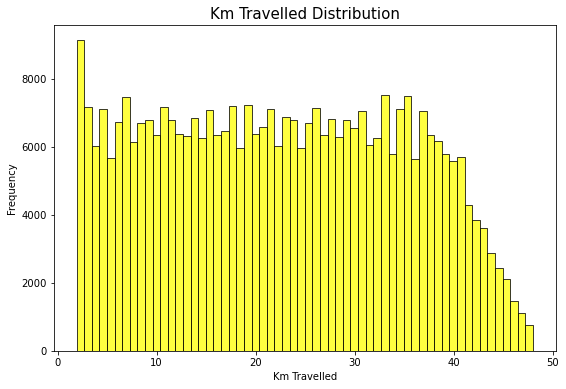

In [28]:
plt.figure(figsize=(9,6))
ax=sns.histplot(data=master_df, x="KM Travelled",bins=60, color= 'yellow')
plt.title('Km Travelled Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

#### Charged price

Text(0.5, 0, 'Price Charged')

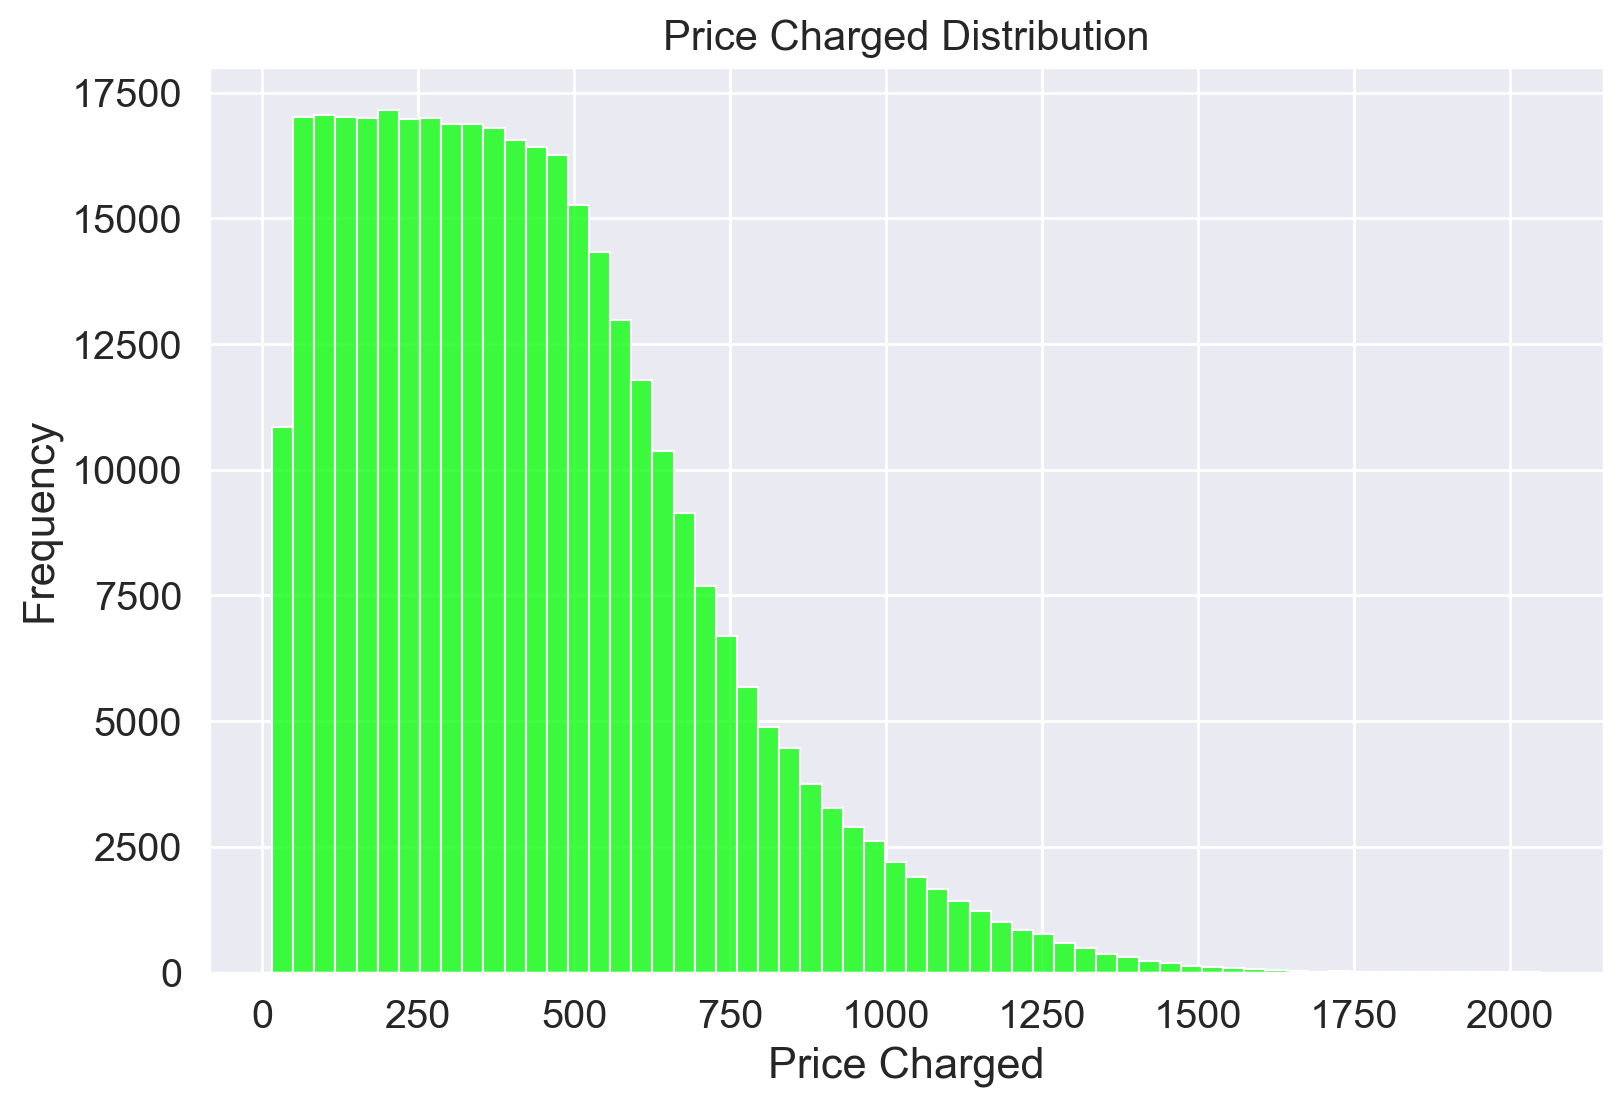

In [47]:
plt.figure(figsize=(9,6), dpi = 200)
sns.histplot(data=master_df, x="Price Charged",bins=60 , color= 'lime')
plt.title('Price Charged Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

#### Cost of trip

Text(0.5, 0, 'Cost of Trip')

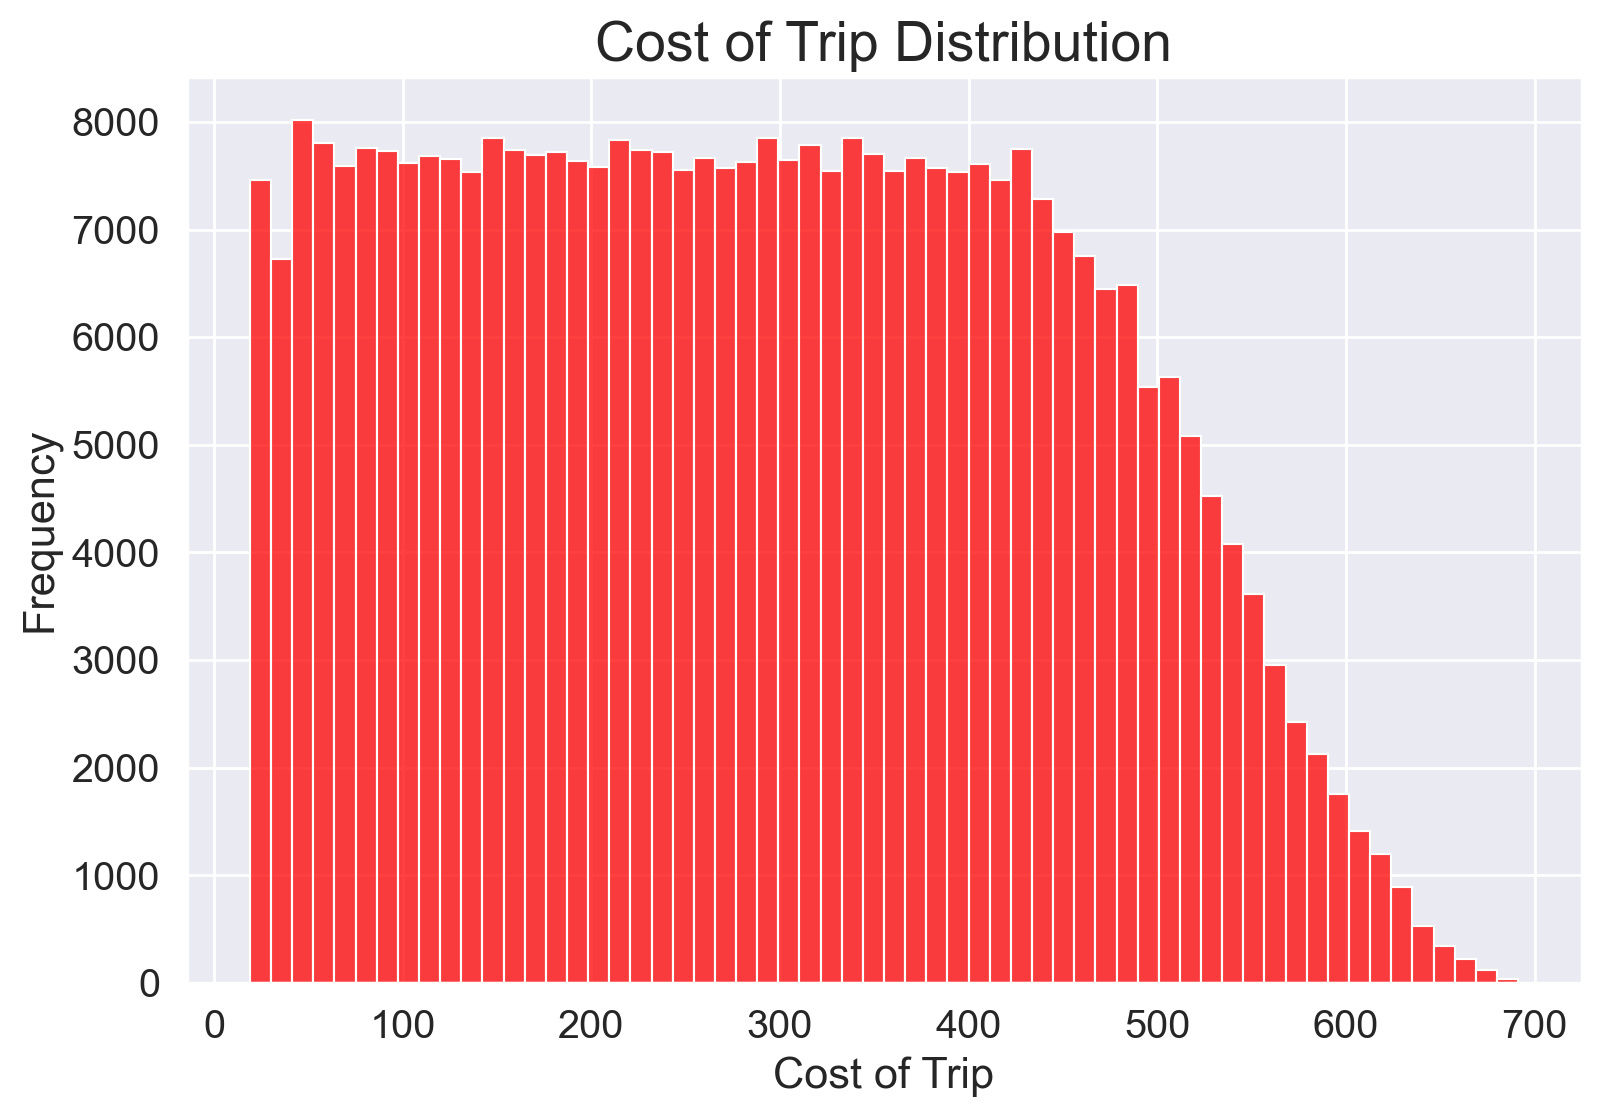

In [46]:
plt.figure(figsize=(9,6), dpi = 200)
sns.histplot(data= master_df,x="Cost of Trip",bins=60 , color= 'red')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

#### Payment Mode

Text(0.5, 0, 'Payment Mode')

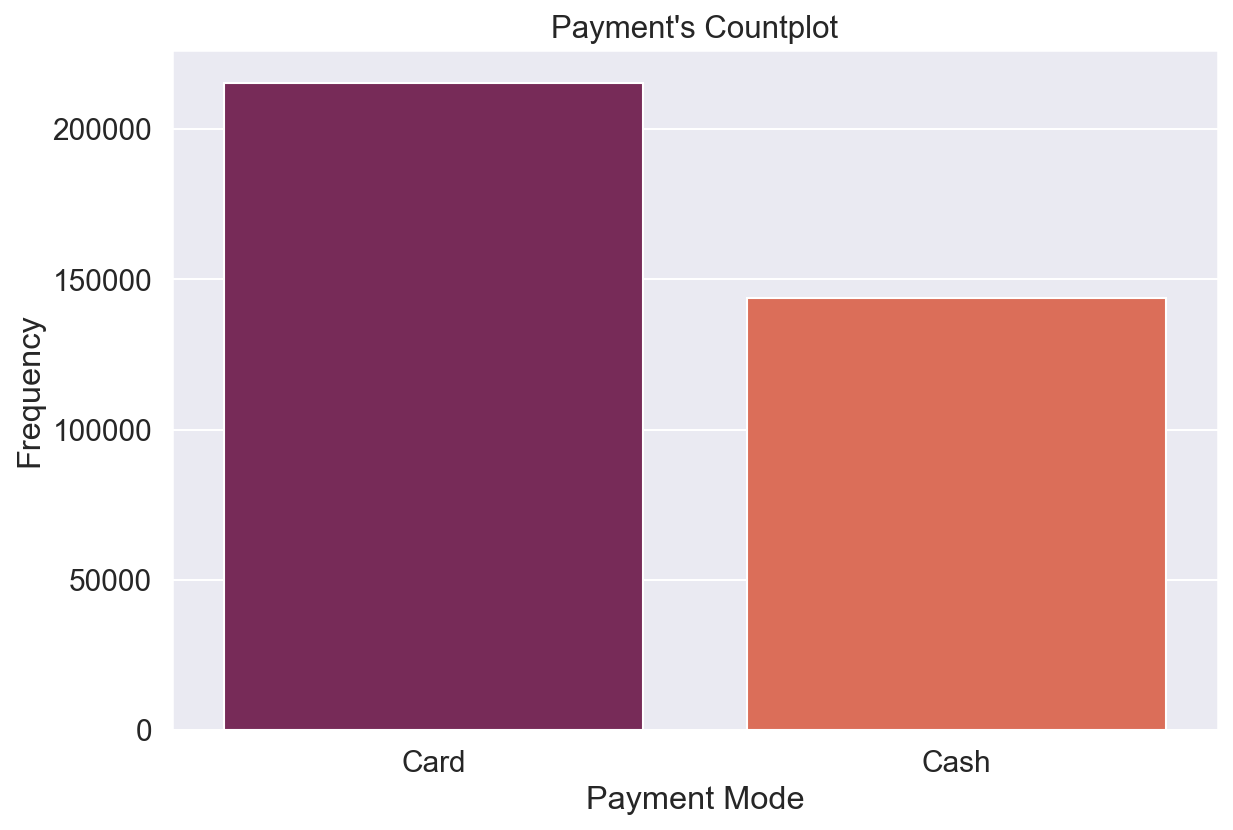

In [45]:
plt.figure(figsize=(9,6), dpi = 150)
sns.countplot(data=master_df, x="Payment_Mode", palette='rocket')
plt.title("Payment's Countplot", fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

#### Gender

Text(0.5, 0, 'Gender')

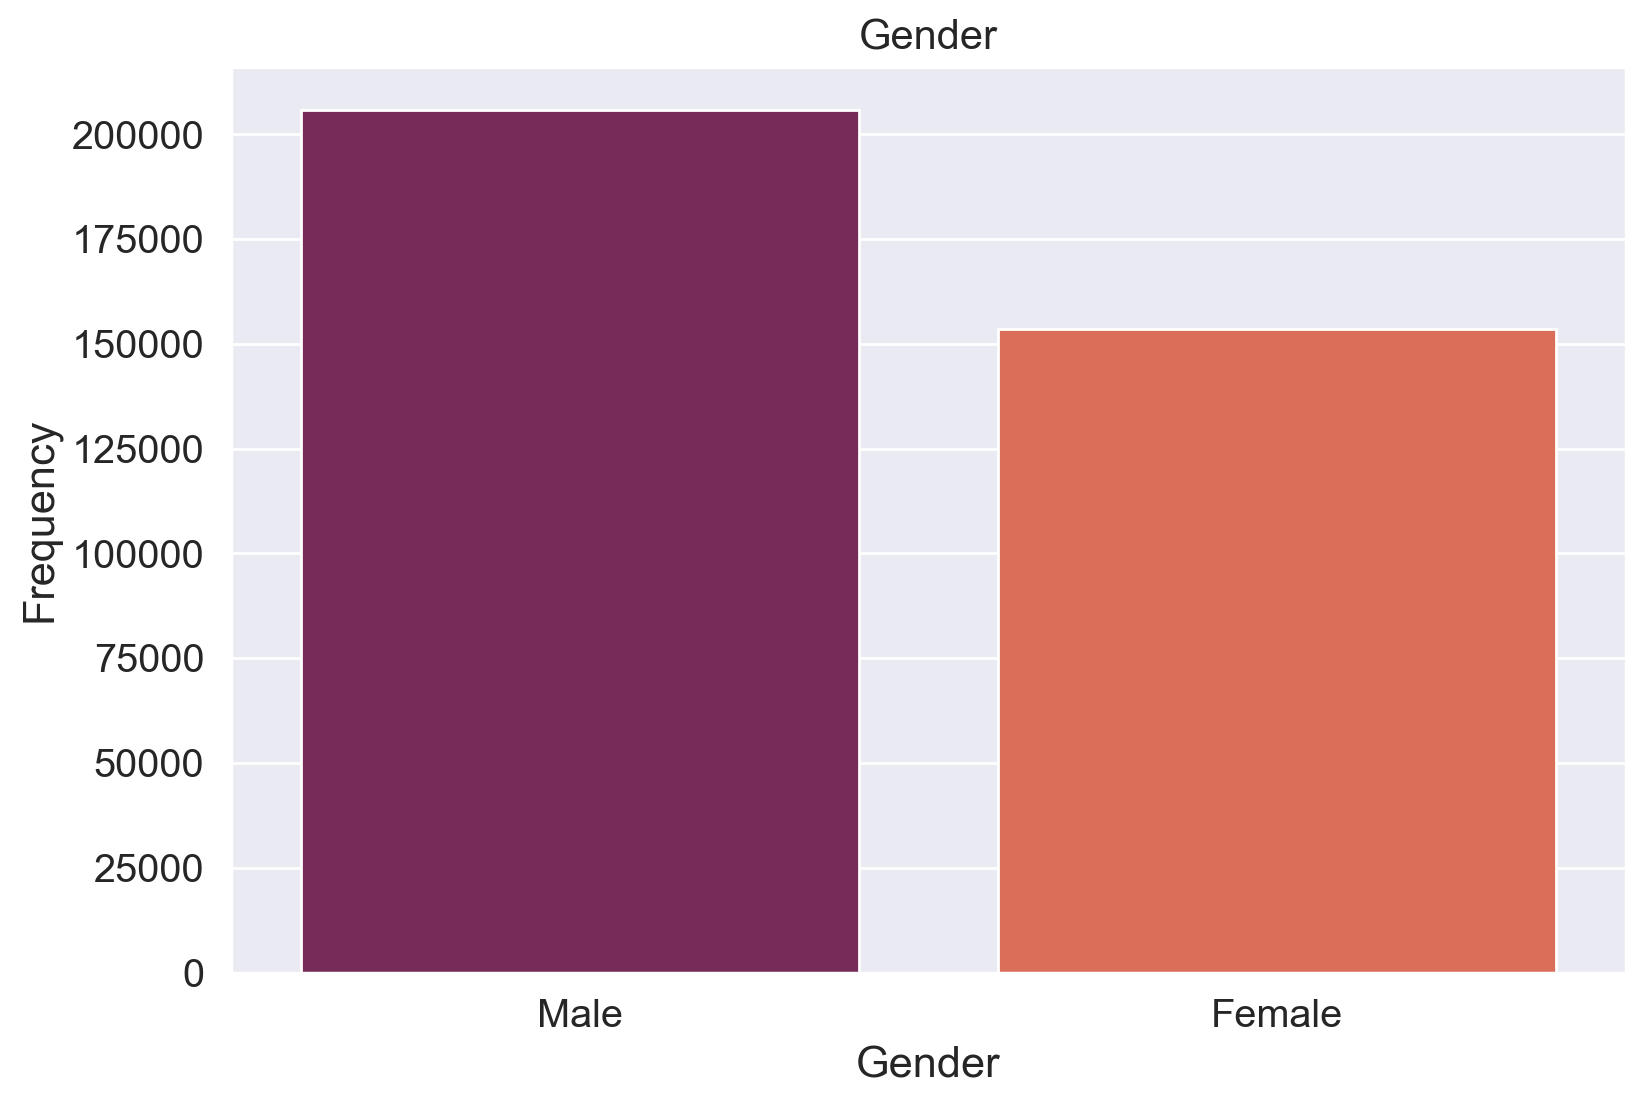

In [44]:
plt.figure(figsize=(9,6), dpi = 200)
sns.countplot(data=master_df, x="Gender", palette='rocket')
plt.title('Gender', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Gender')

#### Age distribution

Text(0.5, 0, 'Age')

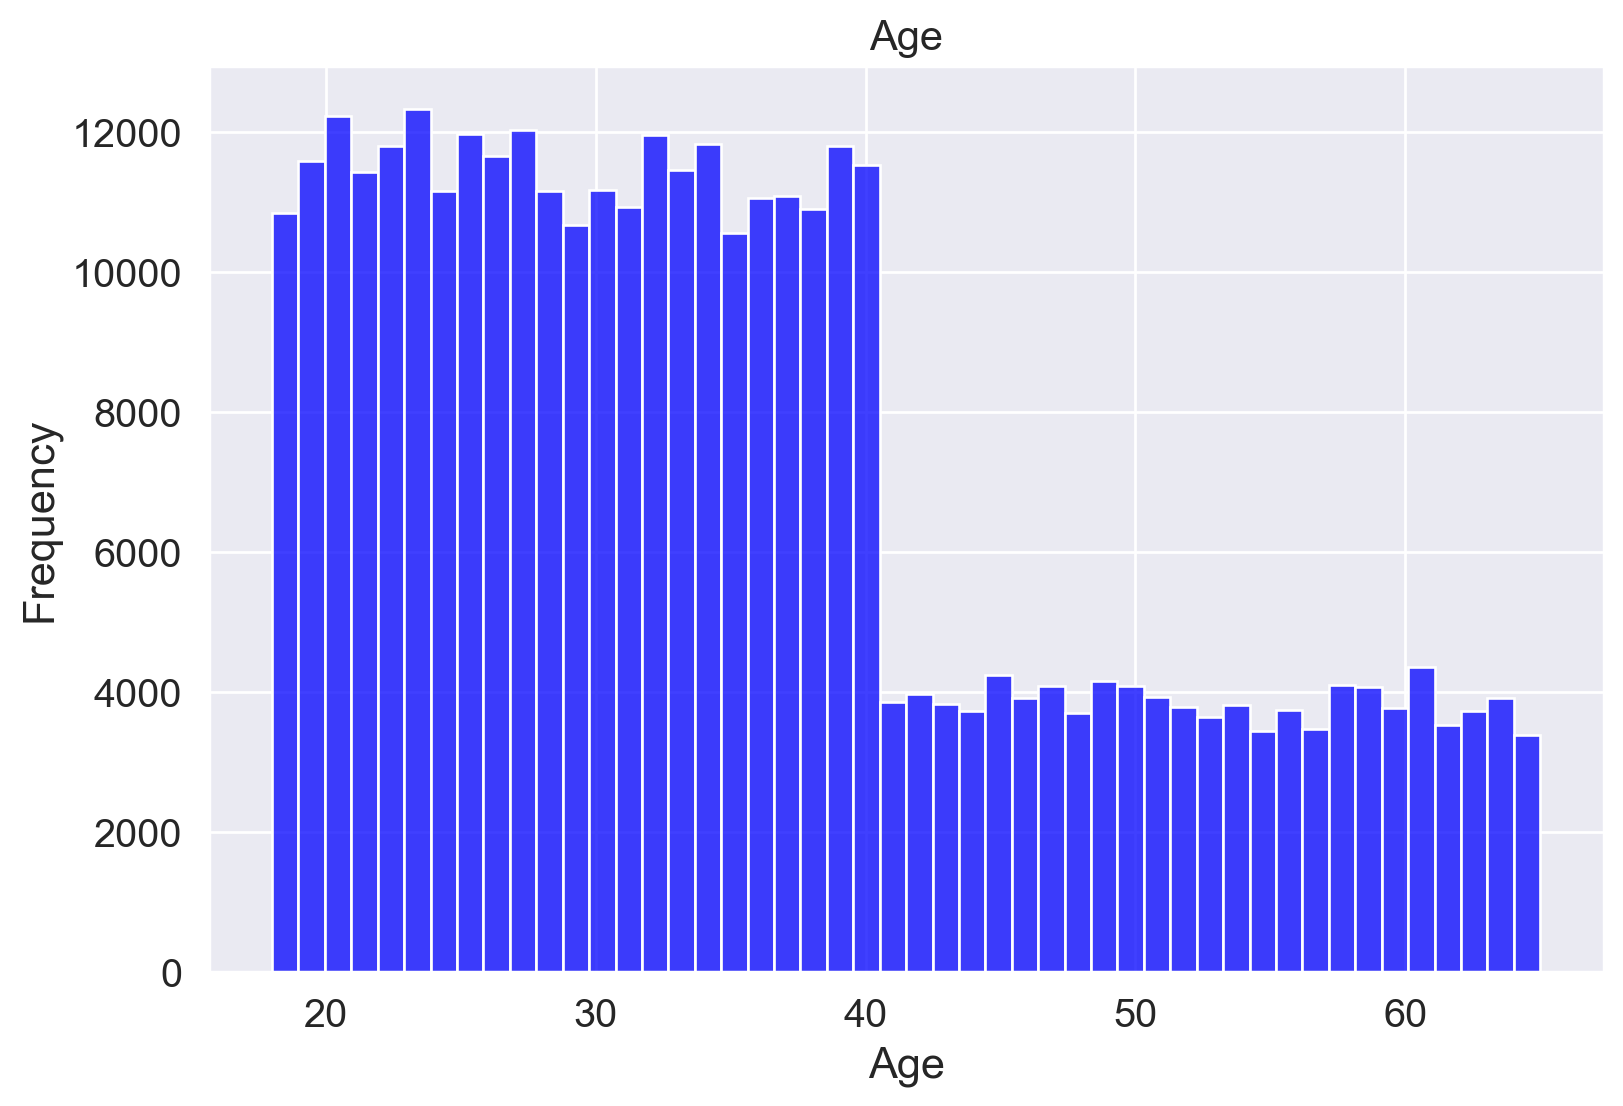

In [43]:
plt.figure(figsize=(9,6), dpi = 200)
sns.histplot(data= master_df,x="Age",bins=48 , color= 'blue')
plt.title('Age', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Age')

#### Cost per Km

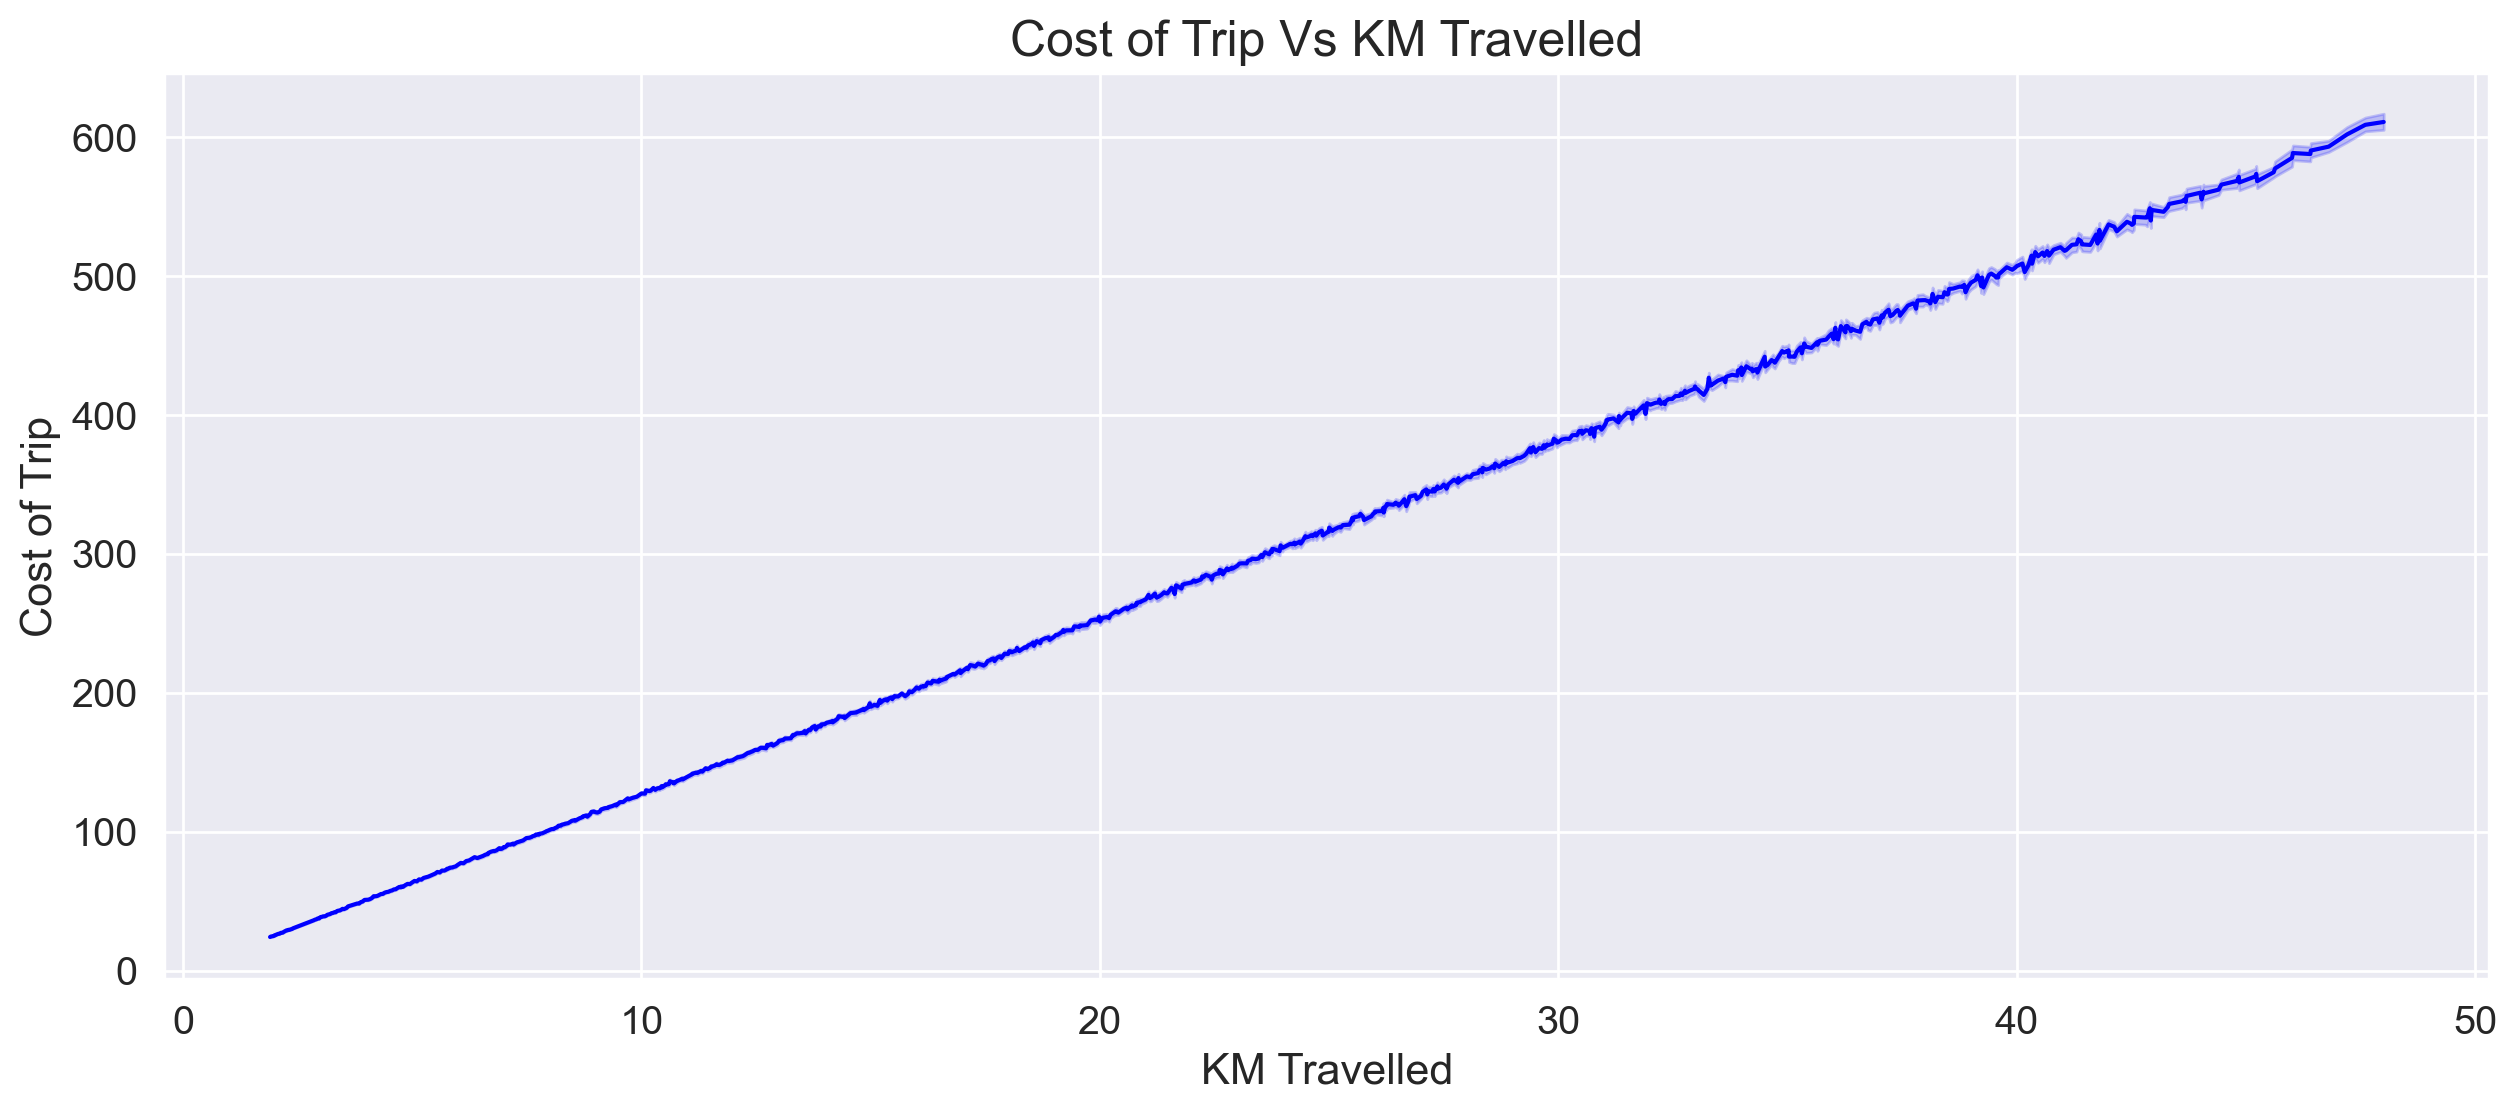

In [42]:
plt.figure(figsize=(15,6), dpi = 200)
sns.lineplot(data=master_df, x="KM Travelled",y='Cost of Trip', color= 'blue')
plt.title('Cost of Trip Vs KM Travelled', fontsize=18)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()

#### CORRELATIONS

In [35]:
master_df.corr()

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   

                    Customer ID       Age  Income (USD/Month)  Population  \
Transaction ID        -0.016912 -0.001267           -0.001570    0.023868   
KM Travelled           0.000389 -0.000369           -0.000544   -0.002311   
Price Charged         -0.177324 -0.003084            0.003228    0.326589   
Cost of Trip           0.003077 -0.000189           -0.000633    0.015108   
Customer ID            1.000000 -0.004735           -0.013608   -0.647052   
Age                   -0.004735  1.000000            0.003907   -0.009002   
Income (USD/Month)    -0.013608  0.003907            1.000000    0.011868   
Population            -0.647052 -0.009002            0.011868    1.000000   
Users                 -0.610742 -0.005906            0.010464    0.915490   

                       Users  
Transaction ID      0.013526  
KM Travelled       -0.000428  
Price Charged       0.281061  
Cost of Trip        0.023628  
Customer ID        -0.610742  
Age                -0.005906  
Income (USD/Month)  0.010464  
Population          0.915490  
Users               1.000000

#### Check Data Types

In [36]:
master_df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

In [48]:
master_df['Income (USD/Month)'] = master_df['Income (USD/Month)'].astype(float)
master_df['Population'] = master_df['Population'].astype(int)
master_df['Users'] = master_df['Users'].astype(int)
master_df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int64
Users                          int64
dtype: object

#### Missing Values

In [49]:
master_df.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

#### Check Duplicates

In [50]:
duplicated_rows = master_df[master_df.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


#### OUTLIERS

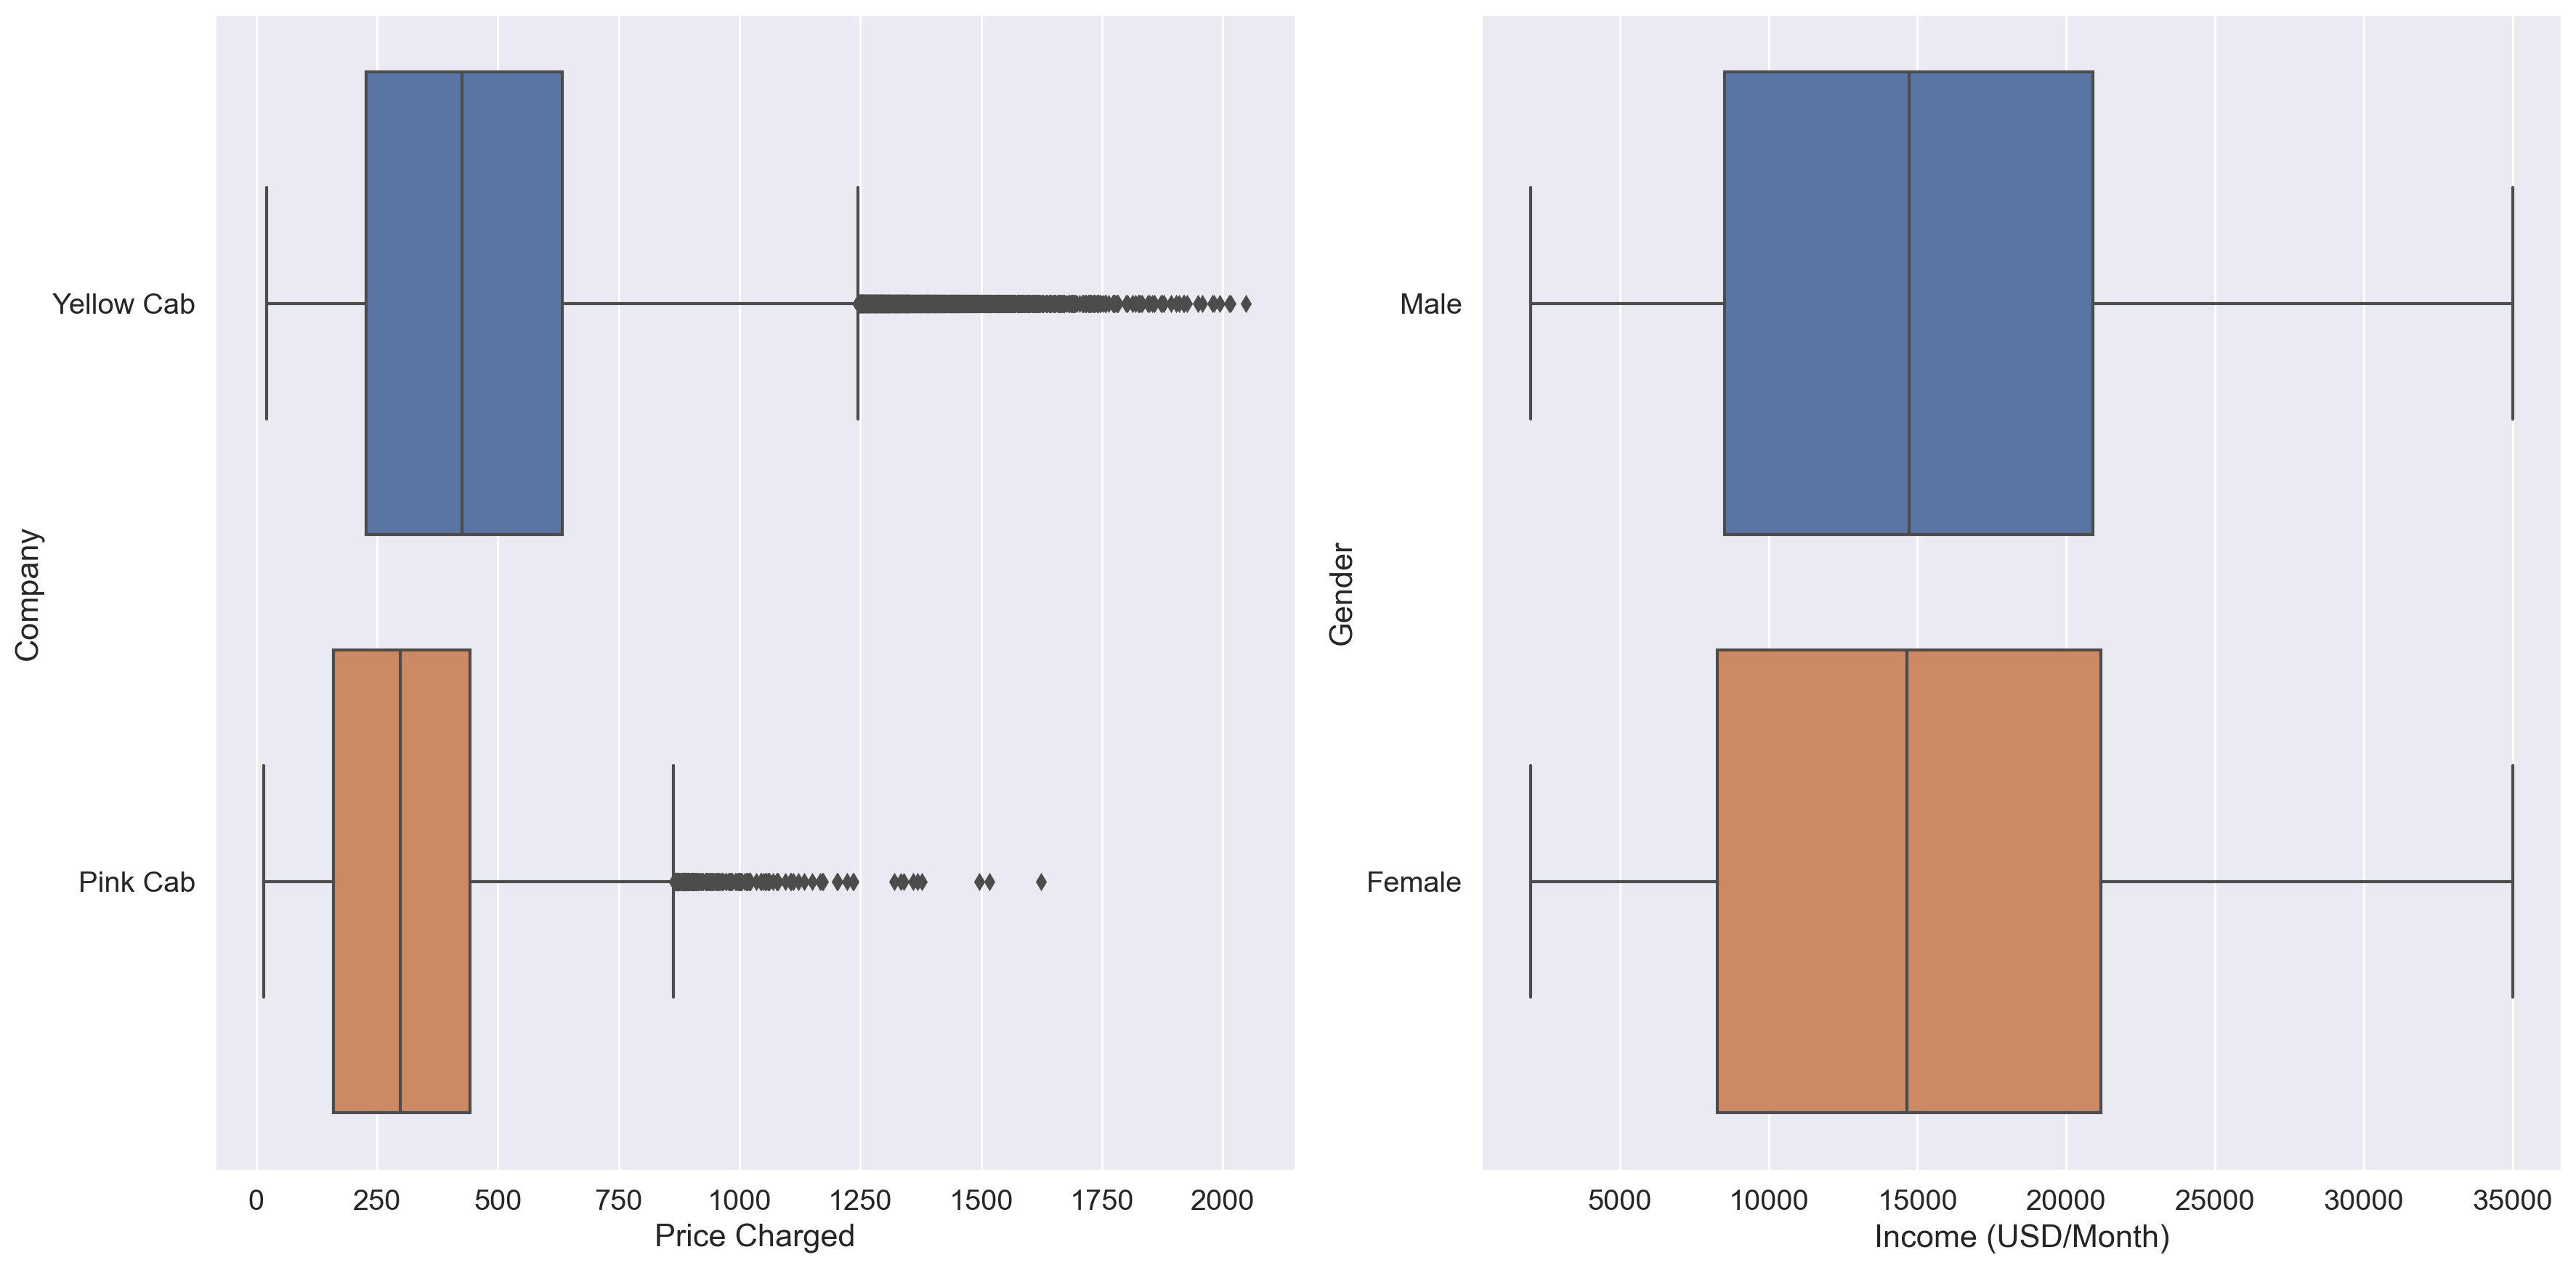

In [51]:
plt.figure(figsize=(18,9), dpi = 200)

plt.subplot(1,2,1)
sns.set(font_scale = 1.3)
sns.boxplot(data = master_df, y = 'Company', x = "Price Charged", dodge=False)


plt.subplot(1,2,2)
sns.set(font_scale = 1.3)
sns.boxplot(data = master_df, y = 'Gender', x = "Income (USD/Month)", dodge=False)


plt.tight_layout()
plt.show()

According to the graphs, there are outliers in the `Price Charged` feature. But since we do not have enough information on the components that made the `Price Charged`, it is not appropriate to treat it as an outlier.

#### Time Series New Dataset

In [52]:
master_df['Year of Travel'] = master_df['Date of Travel'].dt.year
master_df['Month of Travel'] = master_df['Date of Travel'].dt.month
master_df['Day of Travel'] = master_df['Date of Travel'].dt.day
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']

master_new_df=master_df.set_index('Date of Travel')
master_new_df.sort_values('Date of Travel').head()

Transaction ID     Company            City  KM Travelled  \
Date of Travel                                                             
2016-01-01            10001340  Yellow Cab   WASHINGTON DC         10.20   
2016-01-01            10001254  Yellow Cab  SILICON VALLEY         42.12   
2016-01-01            10001242  Yellow Cab  SILICON VALLEY         18.02   
2016-01-01            10000885  Yellow Cab     NEW YORK NY         32.20   
2016-01-01            10000961  Yellow Cab     NEW YORK NY         19.04   

                Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
Date of Travel                                                                 
2016-01-01             202.54      135.8640        52536         Card   Male   
2016-01-01            1342.05      520.6032        13894         Card   Male   
2016-01-01             658.65      240.0264        14513         Card   Male   
2016-01-01             940.73      452.0880         1698         Card   Male   
2016-01-01             634.46      253.6128           85         Card   Male   

                Age  Income (USD/Month)  Population   Users  Year of Travel  \
Date of Travel                                                                
2016-01-01       24             10606.0      418859  127001            2016   
2016-01-01       32             21898.0     1177609   27247            2016   
2016-01-01       62              3892.0     1177609   27247            2016   
2016-01-01       23             22120.0     8405837  302149            2016   
2016-01-01       19             19765.0     8405837  302149            2016   

                Month of Travel  Day of Travel    Profit  
Date of Travel                                            
2016-01-01                    1              1   66.6760  
2016-01-01                    1              1  821.4468  
2016-01-01                    1              1  418.6236  
2016-01-01                    1              1  488.6420  
2016-01-01                    1              1  380.8472

#### YELLOW CAB VS PINK CAB

Creating separate datasets for each company.

#### Yellow Cab

In [53]:
yellow_cab_data= master_new_df[master_new_df['Company']=='Yellow Cab']
print(yellow_cab_data.shape)

yellow_cab_data.head()

(274681, 17)


Transaction ID     Company           City  KM Travelled  \
Date of Travel                                                            
2016-01-01            10001340  Yellow Cab  WASHINGTON DC         10.20   
2016-03-25            10020018  Yellow Cab  WASHINGTON DC          5.94   
2017-04-16            10164725  Yellow Cab  WASHINGTON DC          8.08   
2017-06-23            10188478  Yellow Cab  WASHINGTON DC         13.80   
2017-11-16            10261473  Yellow Cab  WASHINGTON DC         11.60   

                Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
Date of Travel                                                                 
2016-01-01             202.54      135.8640        52536         Card   Male   
2016-03-25              88.50       74.1312        52536         Cash   Male   
2017-04-16             123.21      104.7168        52536         Card   Male   
2017-06-23             283.74      168.9120        52536         Cash   Male   
2017-11-16             180.50      144.7680        52536         Cash   Male   

                Age  Income (USD/Month)  Population   Users  Year of Travel  \
Date of Travel                                                                
2016-01-01       24             10606.0      418859  127001            2016   
2016-03-25       24             10606.0      418859  127001            2016   
2017-04-16       24             10606.0      418859  127001            2017   
2017-06-23       24             10606.0      418859  127001            2017   
2017-11-16       24             10606.0      418859  127001            2017   

                Month of Travel  Day of Travel    Profit  
Date of Travel                                            
2016-01-01                    1              1   66.6760  
2016-03-25                    3             25   14.3688  
2017-04-16                    4             16   18.4932  
2017-06-23                    6             23  114.8280  
2017-11-16                   11             16   35.7320

In [54]:
yellow_cab= master_df[master_df.Company.isin(['Yellow Cab'])]
print(yellow_cab.shape)

yellow_cab.head()

(274681, 18)


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10020018     2016-03-25  Yellow Cab  WASHINGTON DC          5.94   
3        10164725     2017-04-16  Yellow Cab  WASHINGTON DC          8.08   
4        10188478     2017-06-23  Yellow Cab  WASHINGTON DC         13.80   
6        10261473     2017-11-16  Yellow Cab  WASHINGTON DC         11.60   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         202.54      135.8640        52536         Card   Male   24   
1          88.50       74.1312        52536         Cash   Male   24   
3         123.21      104.7168        52536         Card   Male   24   
4         283.74      168.9120        52536         Cash   Male   24   
6         180.50      144.7680        52536         Cash   Male   24   

   Income (USD/Month)  Population   Users  Year of Travel  Month of Travel  \
0             10606.0      418859  127001            2016                1   
1             10606.0      418859  127001            2016                3   
3             10606.0      418859  127001            2017                4   
4             10606.0      418859  127001            2017                6   
6             10606.0      418859  127001            2017               11   

   Day of Travel    Profit  
0              1   66.6760  
1             25   14.3688  
3             16   18.4932  
4             23  114.8280  
6             16   35.7320

#### Pink Cab

In [55]:
pink_cab_data= master_new_df[master_new_df.Company.isin(['Pink Cab'])]
print(pink_cab_data.shape)
pink_cab_data.head()

(84711, 17)


Transaction ID   Company           City  KM Travelled  \
Date of Travel                                                          
2016-11-08            10102932  Pink Cab  WASHINGTON DC         15.21   
2017-10-30            10249981  Pink Cab  WASHINGTON DC         28.00   
2017-10-19            10242139  Pink Cab  WASHINGTON DC         26.78   
2017-02-10            10143658  Pink Cab  WASHINGTON DC         42.55   
2016-12-20            10125156  Pink Cab  WASHINGTON DC         10.00   

                Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
Date of Travel                                                                 
2016-11-08             179.33       153.621        52536         Cash   Male   
2017-10-30             424.20       280.000        52536         Card   Male   
2017-10-19             371.96       313.326        53683         Card   Male   
2017-02-10             504.03       489.325        53126         Cash   Male   
2016-12-20             151.06       104.000        51580         Card   Male   

                Age  Income (USD/Month)  Population   Users  Year of Travel  \
Date of Travel                                                                
2016-11-08       24             10606.0      418859  127001            2016   
2017-10-30       24             10606.0      418859  127001            2017   
2017-10-19       26              9389.0      418859  127001            2017   
2017-02-10       24              3032.0      418859  127001            2017   
2016-12-20       51              6115.0      418859  127001            2016   

                Month of Travel  Day of Travel   Profit  
Date of Travel                                           
2016-11-08                   11              8   25.709  
2017-10-30                   10             30  144.200  
2017-10-19                   10             19   58.634  
2017-02-10                    2             10   14.705  
2016-12-20                   12             20   47.060

In [56]:
pink_cab= master_df[master_df.Company.isin(['Pink Cab'])]
print(pink_cab.shape)

pink_cab.head()

(84711, 18)


Transaction ID Date of Travel   Company           City  KM Travelled  \
2         10102932     2016-11-08  Pink Cab  WASHINGTON DC         15.21   
5         10249981     2017-10-30  Pink Cab  WASHINGTON DC         28.00   
19        10242139     2017-10-19  Pink Cab  WASHINGTON DC         26.78   
29        10143658     2017-02-10  Pink Cab  WASHINGTON DC         42.55   
63        10125156     2016-12-20  Pink Cab  WASHINGTON DC         10.00   

    Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
2          179.33       153.621        52536         Cash   Male   24   
5          424.20       280.000        52536         Card   Male   24   
19         371.96       313.326        53683         Card   Male   26   
29         504.03       489.325        53126         Cash   Male   24   
63         151.06       104.000        51580         Card   Male   51   

    Income (USD/Month)  Population   Users  Year of Travel  Month of Travel  \
2              10606.0      418859  127001            2016               11   
5              10606.0      418859  127001            2017               10   
19              9389.0      418859  127001            2017               10   
29              3032.0      418859  127001            2017                2   
63              6115.0      418859  127001            2016               12   

    Day of Travel   Profit  
2               8   25.709  
5              30  144.200  
19             19   58.634  
29             10   14.705  
63             20   47.060

#### PROFIT SUMMARY

In [57]:
profit = master_df.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
profit.head(6)

Profit
Company    Year of Travel              
Pink Cab   2016            1.739883e+06
           2017            2.015101e+06
           2018            1.552345e+06
Yellow Cab 2016            1.407389e+07
           2017            1.646427e+07
           2018            1.348222e+07

In [58]:
price=master_df.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')

price.head()

Price
Company    Year of Travel              
Pink Cab   2016            7.986269e+06
           2017            9.530736e+06
           2018            8.811246e+06
Yellow Cab 2016            3.883363e+07
           2017            4.558291e+07

In [59]:
price['%Profit'] =(profit['Profit']*100) /price['Price']

price.head(6)

Price    %Profit
Company    Year of Travel                         
Pink Cab   2016            7.986269e+06  21.785926
           2017            9.530736e+06  21.143179
           2018            8.811246e+06  17.617770
Yellow Cab 2016            3.883363e+07  36.241491
           2017            4.558291e+07  36.119383
           2018            4.143734e+07  32.536399

<a id="5"></a> <br>
## 5. Profit Analysis

#### Annual Profits

In [62]:
yellow_df = yellow_cab_data.Profit.resample('Y').sum()
yellow_yearly= pd.DataFrame(yellow_df)

pink_df = pink_cab_data.Profit.resample('Y').sum()
pink_yearly= pd.DataFrame(pink_df)

print(yellow_yearly)
print(pink_yearly)

yellow_df_m = yellow_cab_data.Profit.resample('m').sum()
yellow_monthly = pd.DataFrame(yellow_df_m)
pink_df_m = pink_cab_data.Profit.resample('m').sum()
pink_monthly = pd.DataFrame(pink_df_m)

print(yellow_monthly.head())
print(pink_monthly.head())

                      Profit
Date of Travel              
2016-12-31      1.407389e+07
2017-12-31      1.646427e+07
2018-12-31      1.348222e+07
                     Profit
Date of Travel             
2016-12-31      1739882.628
2017-12-31      2015100.657
2018-12-31      1552345.036
                      Profit
Date of Travel              
2016-01-31      8.535861e+05
2016-02-29      1.007479e+06
2016-03-31      9.181432e+05
2016-04-30      1.018717e+06
2016-05-31      1.208193e+06
                   Profit
Date of Travel           
2016-01-31      74206.169
2016-02-29      88384.294
2016-03-31      88280.732
2016-04-30      86058.292
2016-05-31      57607.844


In [64]:
yellow_yearly['ProfitORides']= yellow_yearly['Profit']/yellow_cab['Date of Travel'].value_counts().resample('Y').sum()
pink_yearly['ProfitORides']= pink_yearly['Profit']/pink_cab['Date of Travel'].value_counts().resample('Y').sum()

yellow_monthly['ProfitORides']= yellow_monthly['Profit']/yellow_cab['Date of Travel'].value_counts().resample('m').sum()
pink_monthly['ProfitORides']= pink_monthly['Profit']/pink_cab['Date of Travel'].value_counts().resample('m').sum()

yellow_yearly['ProfitOKM']= yellow_yearly['Profit']/yellow_cab_data['KM Travelled'].resample('Y').sum()
pink_yearly['ProfitOKM']= pink_yearly['Profit']/pink_cab_data['KM Travelled'].resample('Y').sum()

yellow_monthly['ProfitOKM']= yellow_monthly['Profit']/yellow_cab_data['KM Travelled'].resample('m').sum()
pink_monthly['ProfitOKM']= pink_monthly['Profit']/pink_cab_data['KM Travelled'].resample('m').sum()

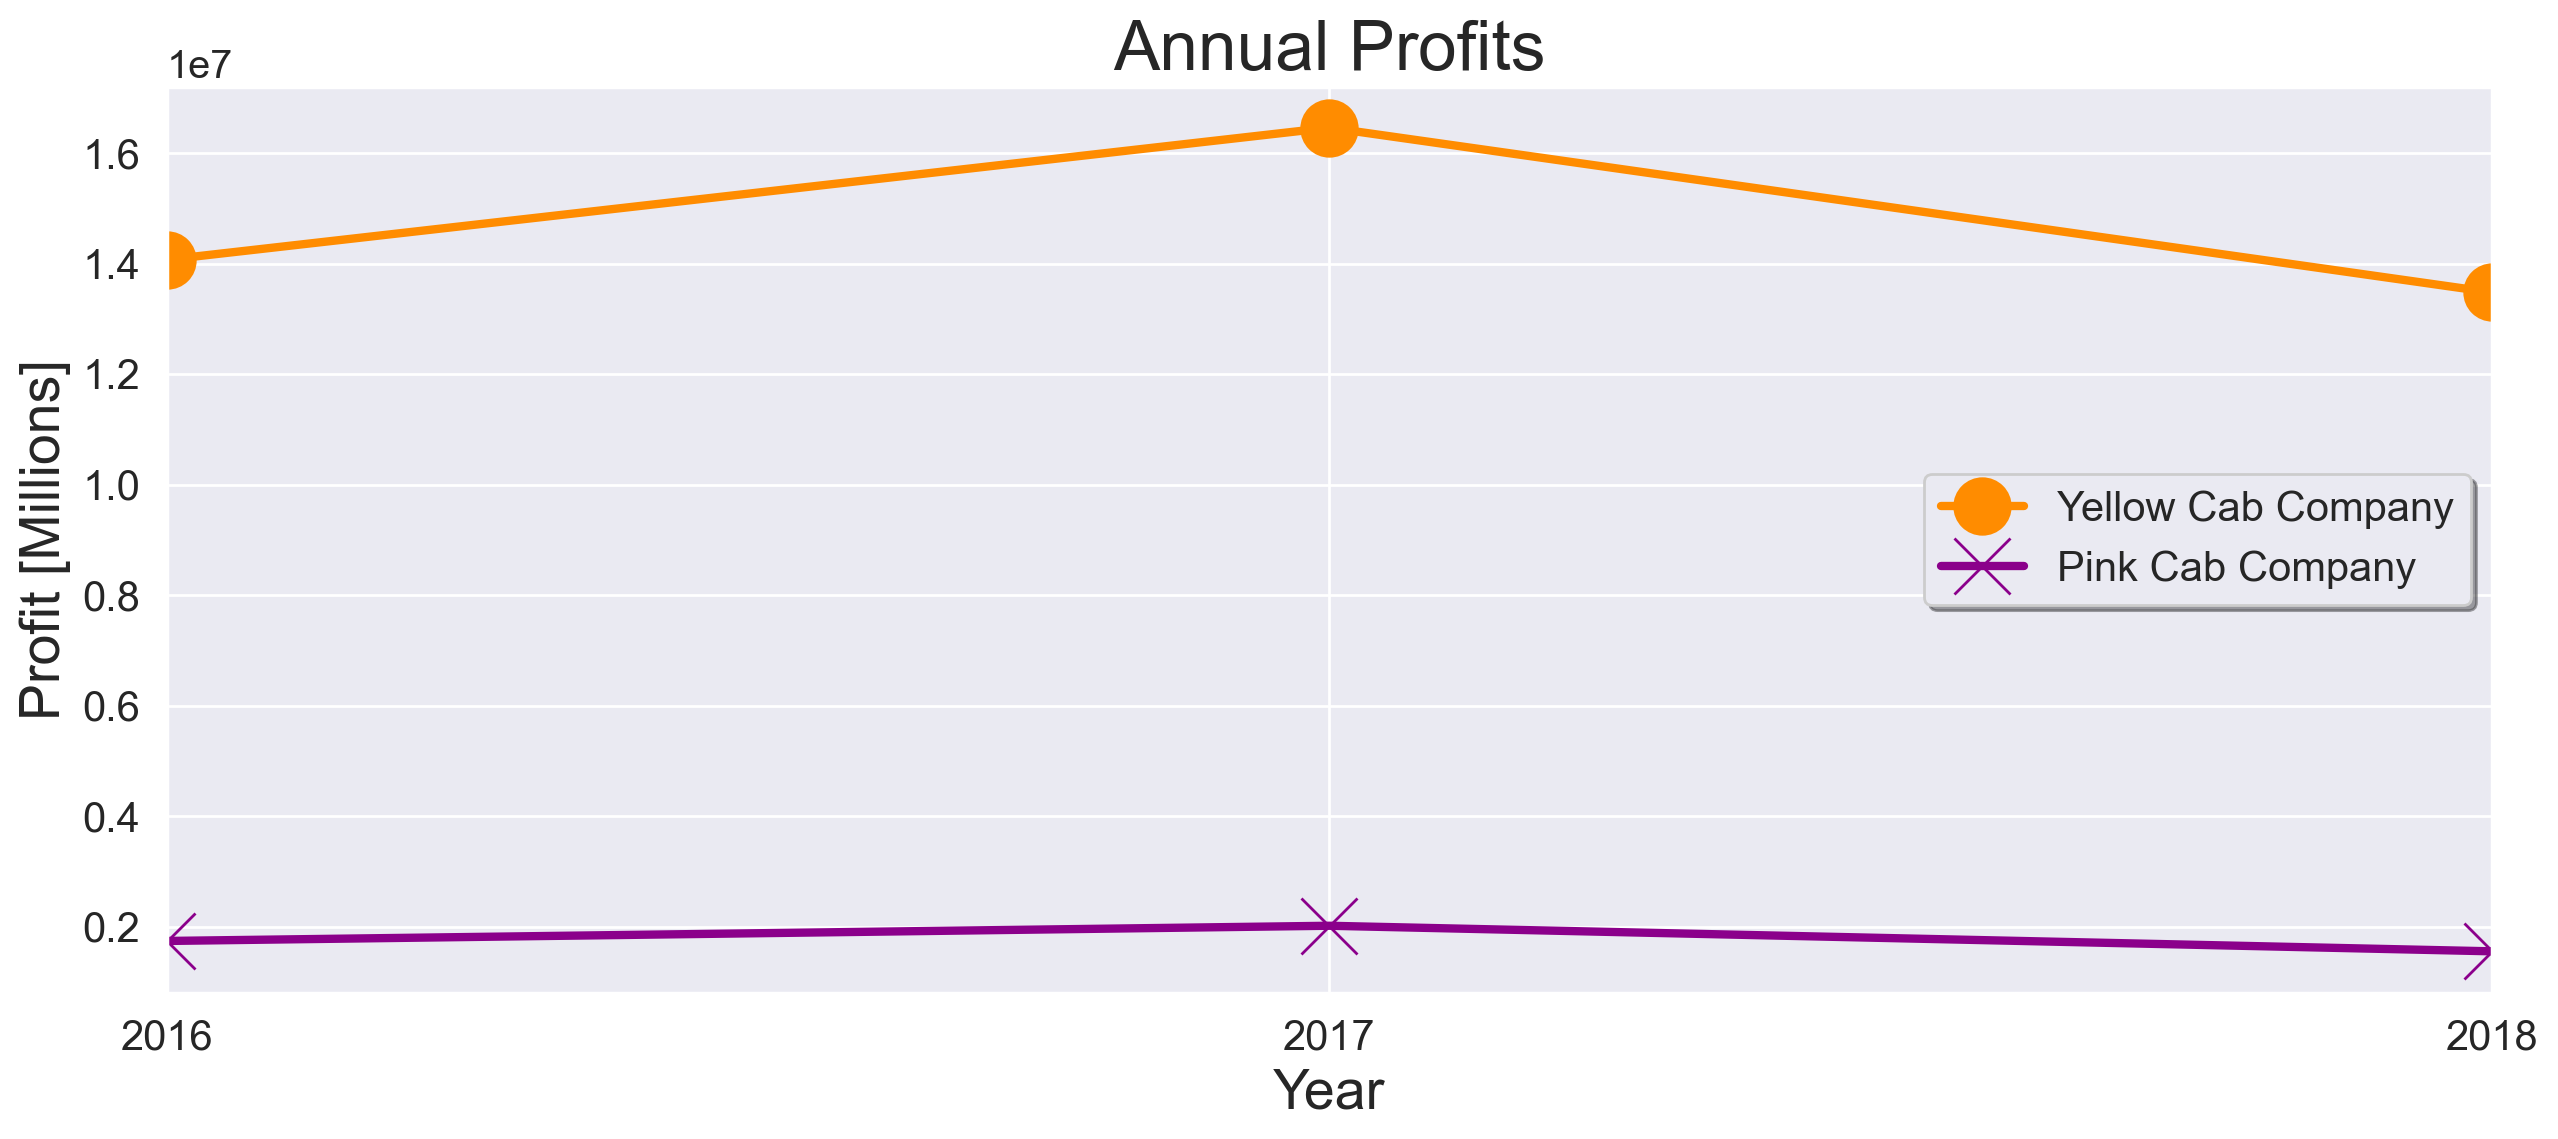

In [120]:
plt.figure(figsize=(15,6), dpi = 200)

fig= yellow_cab_data.Profit.resample('Y').sum().plot.line(color = '#FF8C00',label='Yellow Cab Company',linewidth=3, marker='o', ms = 20)
fig=pink_cab_data.Profit.resample('Y').sum().plot.line(color = '#8B008B',label='Pink Cab Company',linewidth=3, marker='x', ms = 20)
plt.ylabel('Profit [Millions]', fontsize=20)
plt.title('Annual Profits',fontsize=25)
plt.xlabel('Year',  fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.legend(loc='best', shadow=True, fontsize=15)

In [67]:
total_profits_sum = round(master_df.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)
total_profits_sum

Total Profit
Company                 
Pink Cab       5307328.0
Yellow Cab    44020373.0

In [68]:
print("It seems that Yellow Cab's profits are", round(total_profits_sum['Total Profit'][1]/total_profits_sum['Total Profit'][0]), "times higher than Pink Cab's Company over the last 3 years.")

It seems that Yellow Cab's profits are 8 times higher than Pink Cab's Company over the last 3 years.


#### Monthly Profits

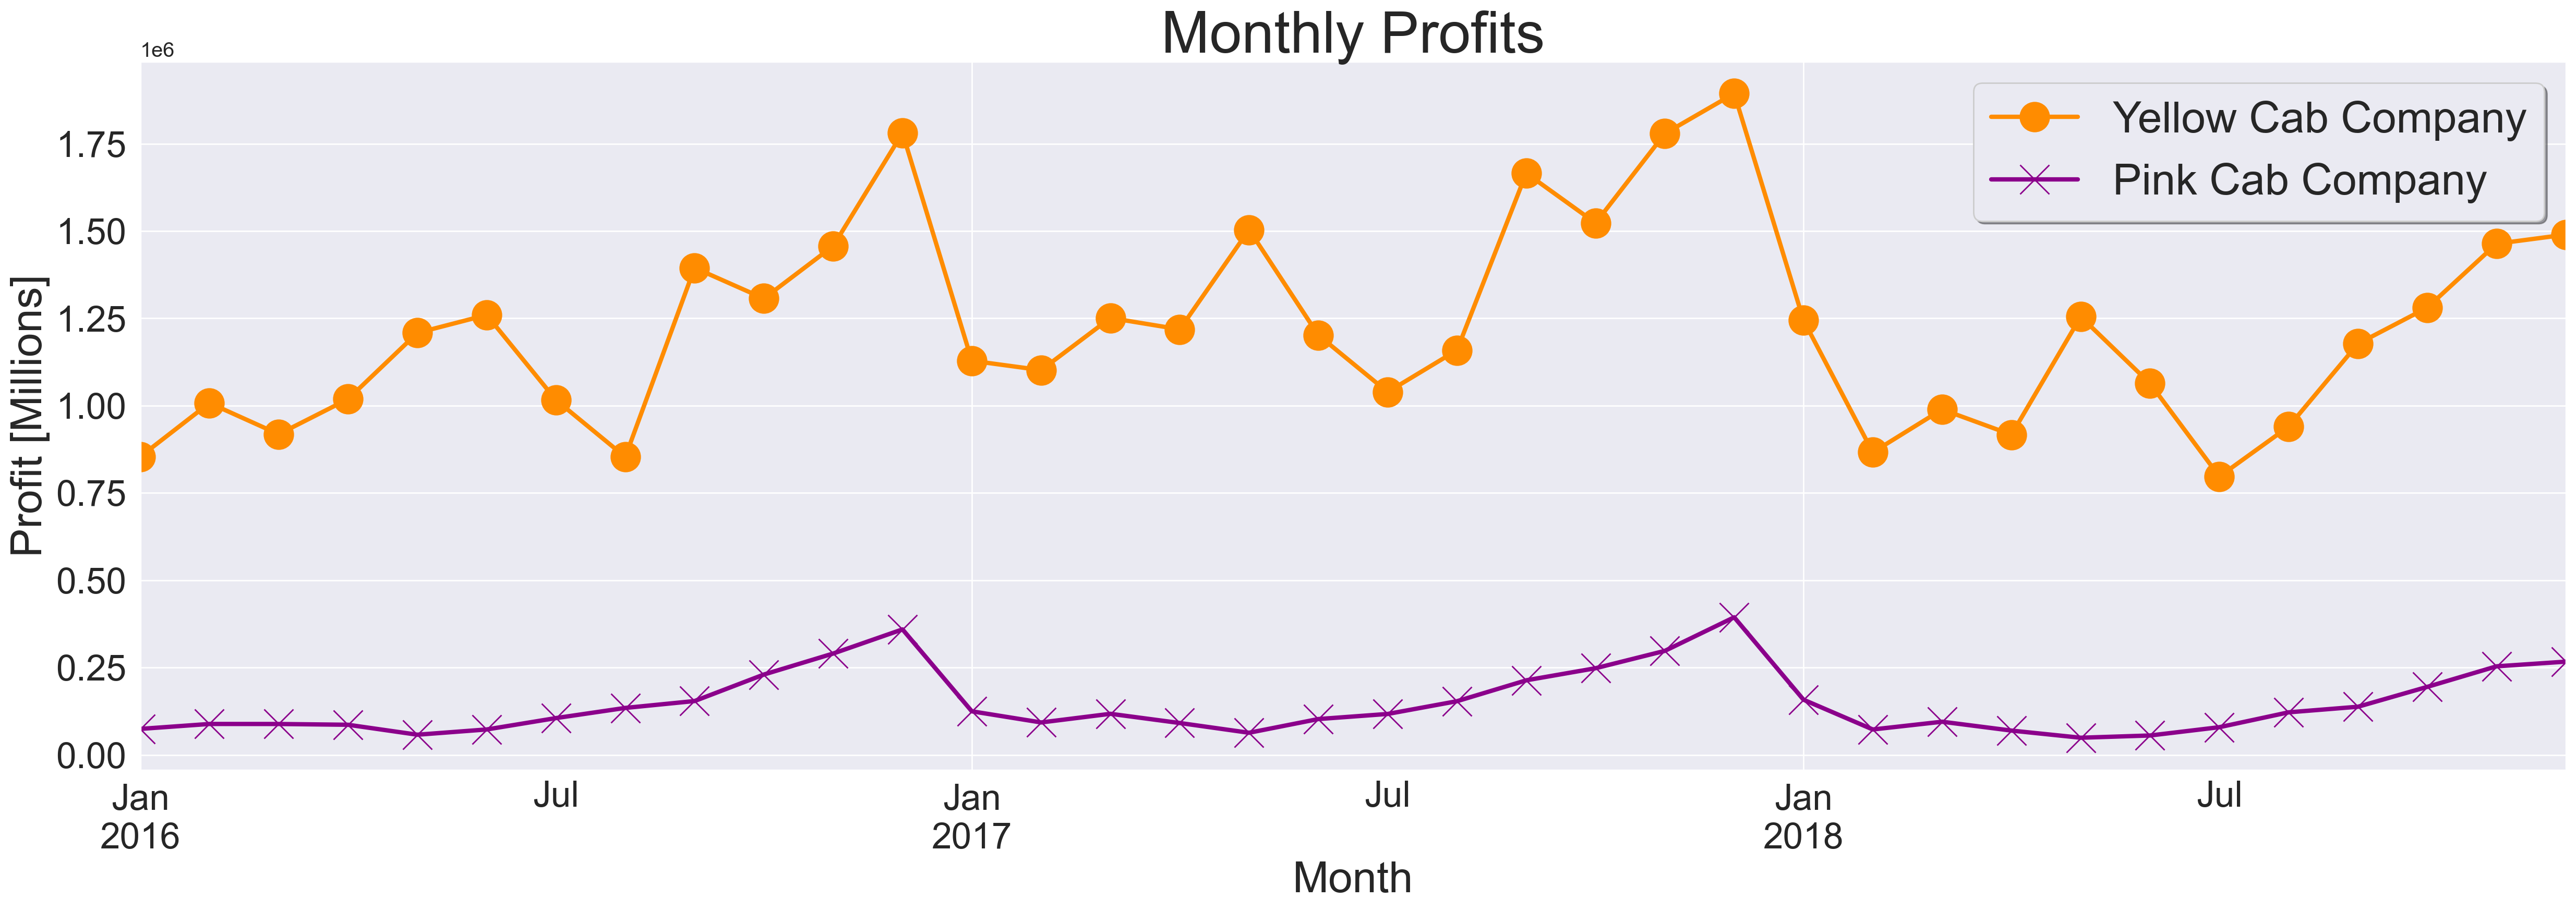

In [119]:
plt.figure(figsize=(30,9), dpi = 200)

fig= yellow_cab_data.Profit.resample('m').sum().plot.line(color = '#FF8C00',label='Yellow Cab Company',linewidth=3, marker ='o',ms = 20,fontsize=25)
fig=pink_cab_data.Profit.resample('m').sum().plot.line(color = '#8B008B',label='Pink Cab Company',linewidth=3, marker='x',ms = 20, fontsize=25)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.ylabel('Profit [Millions]',fontsize=30)
plt.title('Monthly Profits',fontsize=40)
plt.xlabel('Month',fontsize=30)
plt.legend(loc='best', shadow=True, fontsize=30)

In [72]:
monthly_details=master_df.groupby(['Company','Month of Travel'])['Profit'].sum().to_frame('Profit')
monthly_details=monthly_details.reset_index(level='Month of Travel')
monthly_details=monthly_details.reset_index(level='Company')
monthly_details.head()

Company  Month of Travel      Profit
0  Pink Cab                1  356616.533
1  Pink Cab                2  253708.512
2  Pink Cab                3  300511.032
3  Pink Cab                4  246571.372
4  Pink Cab                5  169738.330

In [73]:
y = yellow_cab_data.Profit.resample('m').sum().to_frame('Profit')
p = pink_cab_data.Profit.resample('m').sum().to_frame('Profit')

In [74]:
print('The average monthly profit of Yellow Cab Company is ', round(y.Profit.mean(),1),"  and it's std deviation is ",round(y.Profit.std(),2), 'so, the percentage of the deviation is', round((y.Profit.std() /y.Profit.mean())*100,2),'%')
print('The average monthly profit of Pink Cab Company is ', round(p.Profit.mean(),1),"  and it's std deviation is ",round(p.Profit.std(),2), 'so, the percentage of the deviation is', round((p.Profit.std() /p.Profit.mean())*100,2),'%')

The average monthly profit of Yellow Cab Company is  1222788.1   and it's std deviation is  282187.72 so, the percentage of the deviation is 23.08 %
The average monthly profit of Pink Cab Company is  147425.8   and it's std deviation is  90258.28 so, the percentage of the deviation is 61.22 %


We can see that over the months, Yellow Cab Company's earnings are more stable with fluctuations of 23.08% while PinkCab Company's earnings vary with fluctuations of 61.22%.

### Average profits over Rides

Profit per Ride is an indicator that measures how efficient the company is, in terms of operational costs.

`Profit per Ride = (Total Profits over a certain Period of Time) / ( Number of Rides over that period of Time)`

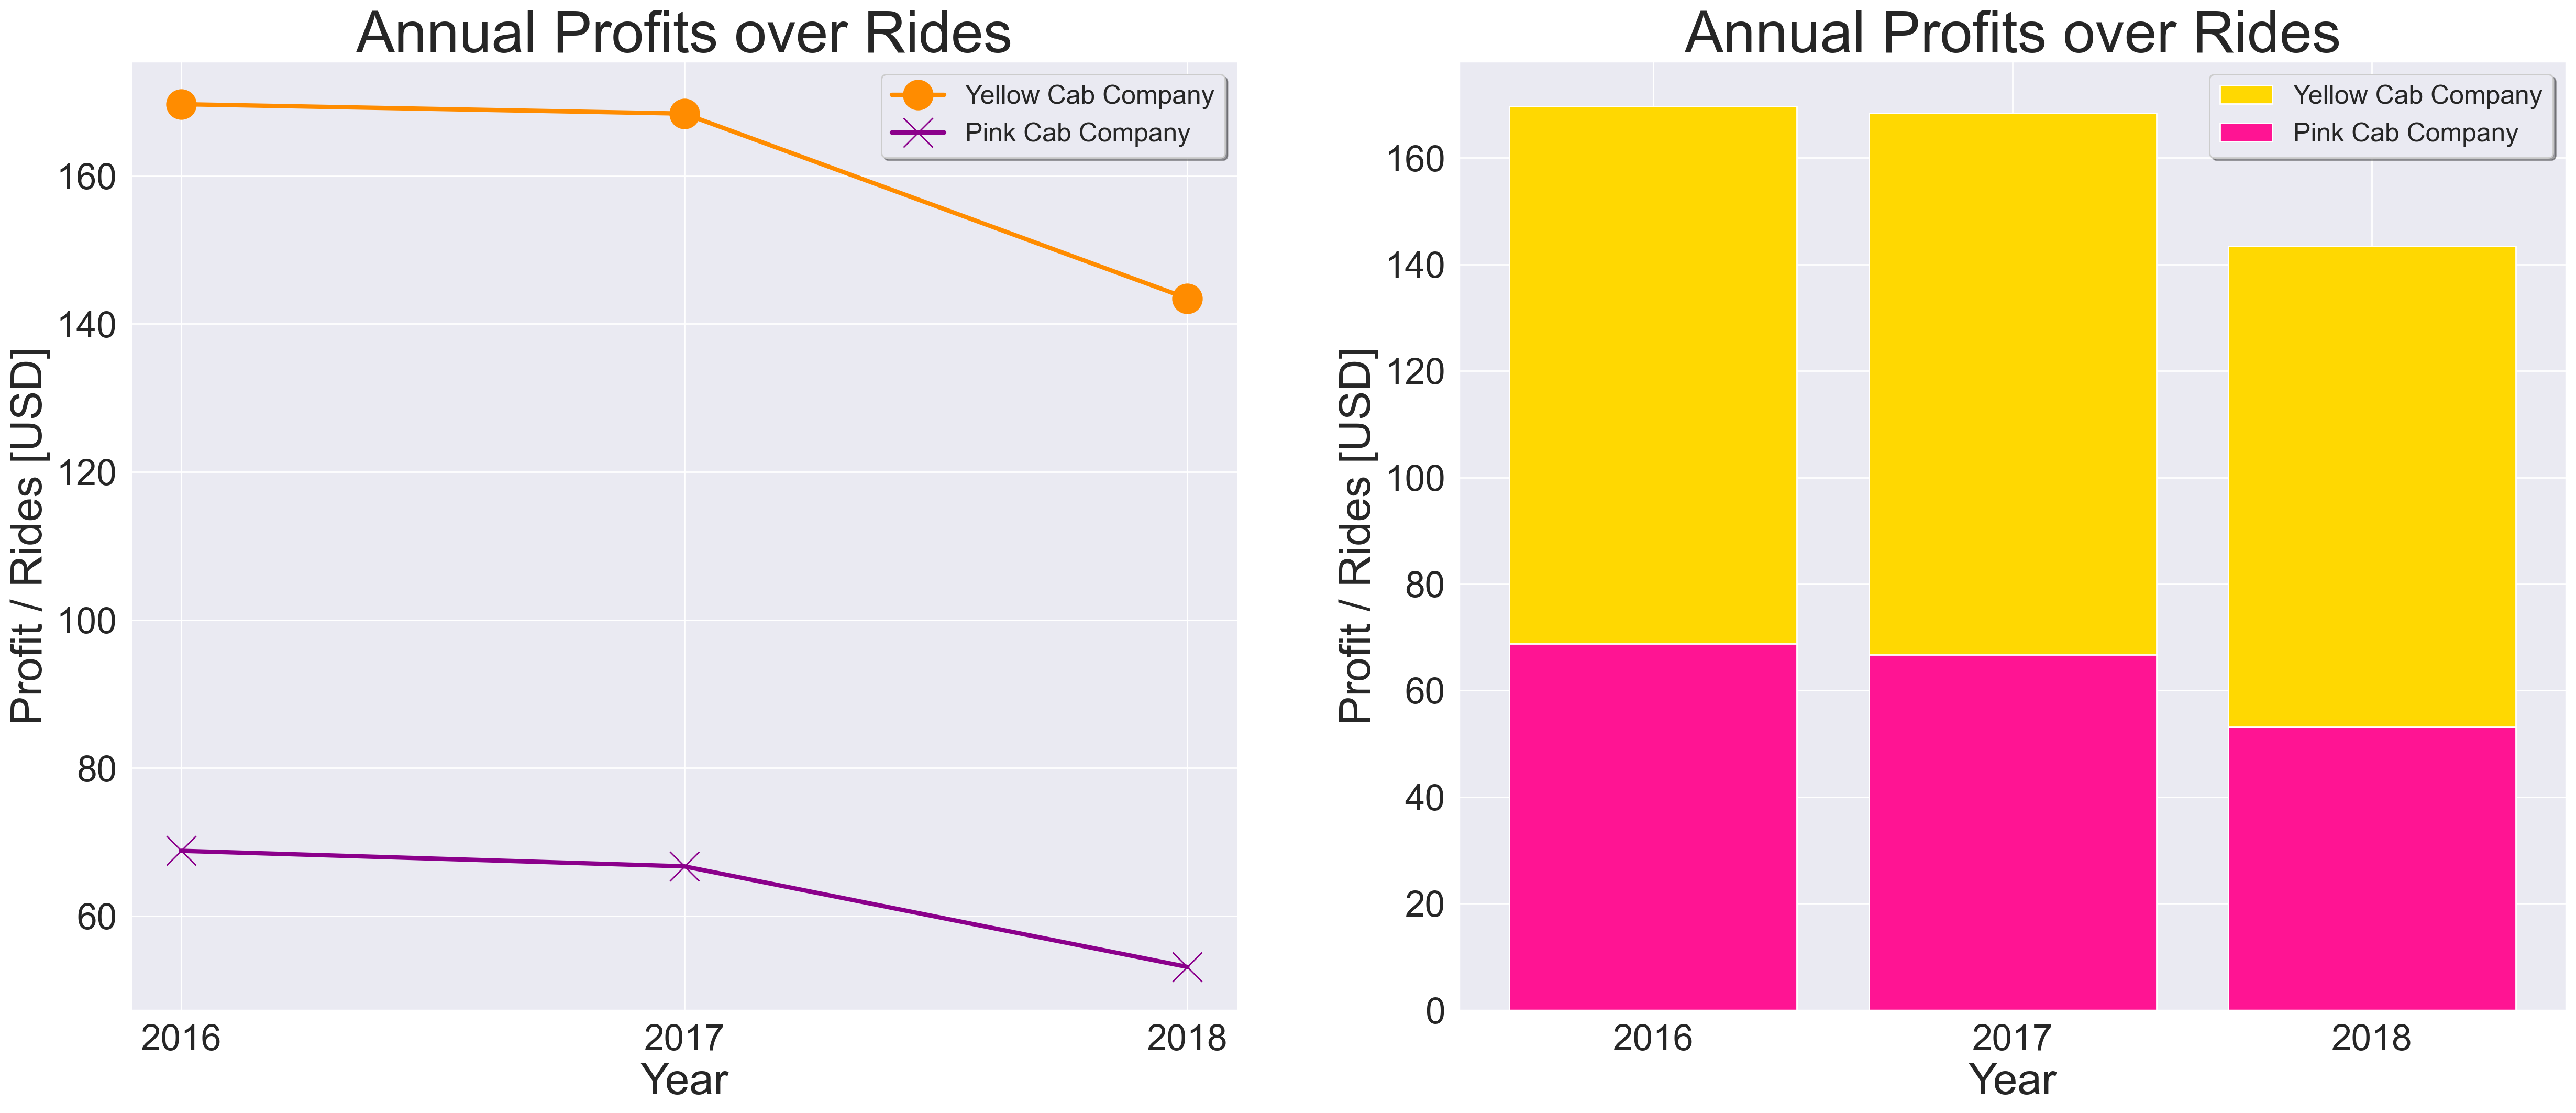

In [118]:
plt.figure(figsize=(30,12), dpi = 200)

plt.subplot(1,2,2)
x1= yellow_yearly.ProfitORides.resample('Y').sum()
x2= pink_yearly.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = yellow_yearly,
        color = '#FFD801',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = pink_yearly, 
        color = '#FF1493',label='Pink Cab Company')
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.title('Annual Profits over Rides',fontsize=40)
plt.ylabel('Profit / Rides [USD]',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.legend(loc='upper right', shadow=True, fontsize=18)

plt.subplot(1,2,1)
x1= yellow_yearly.ProfitORides.resample('Y').sum()
x2= pink_yearly.ProfitORides.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'ProfitORides', data = yellow_yearly,
         color = '#FF8C00',label='Yellow Cab Company',linewidth=3, marker = 'o', ms = 20)
plt.plot(x2.index.strftime('%Y'),'ProfitORides', data = pink_yearly, 
         color = '#8B008B',label='Pink Cab Company',linewidth=3, marker='x', ms = 20)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.title('Annual Profits over Rides',fontsize=40)
plt.ylabel('Profit / Rides [USD]', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.legend(loc='upper right', shadow=True, fontsize=18)

Profit per ride decreases over time in both companies. 

#### Monthly profits over Rides

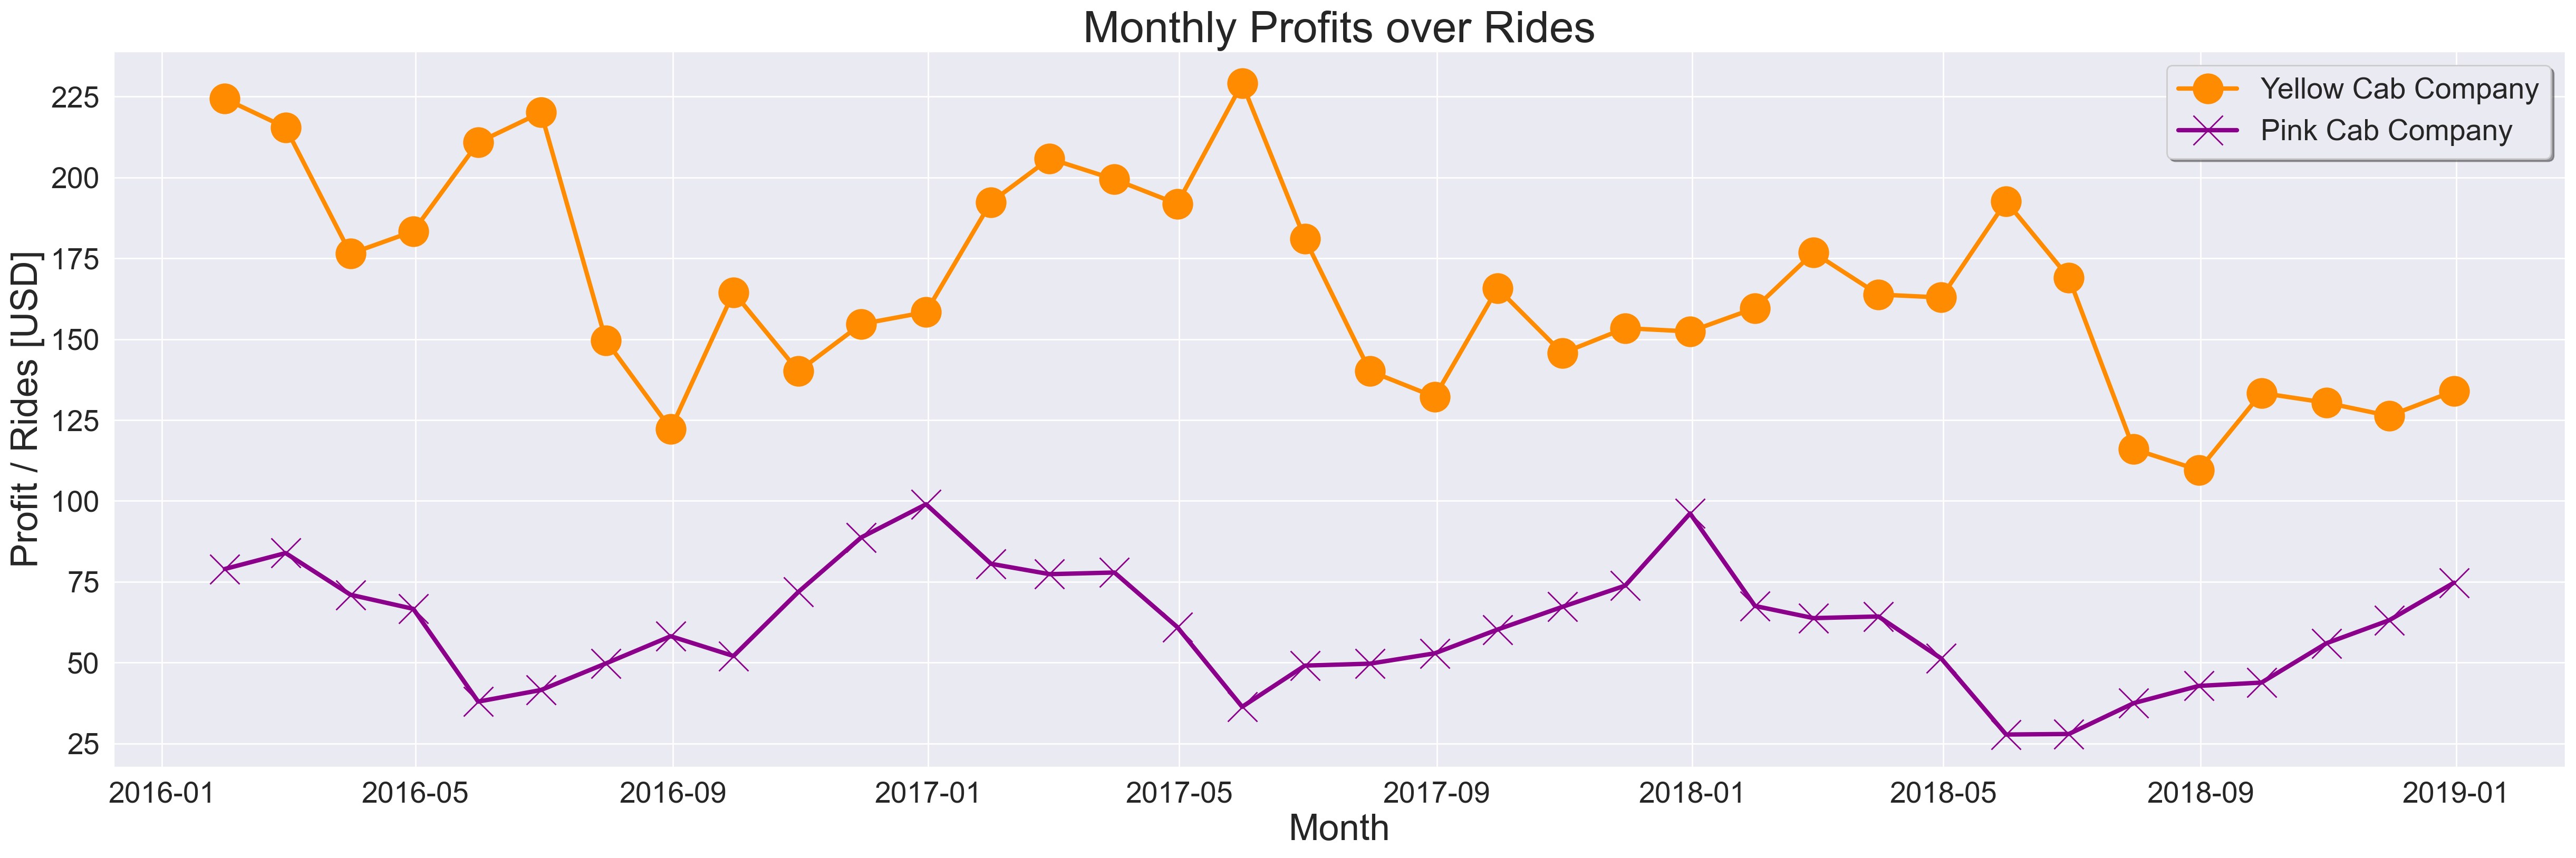

In [117]:
plt.figure(figsize=(30,9), dpi = 200)

x1= yellow_monthly.ProfitORides.resample('m').sum()
x2= pink_monthly.ProfitORides.resample('m').sum()
plt.plot(x1.index,'ProfitORides', data = yellow_monthly,
         color = '#FF8C00', linewidth = 3,label='Yellow Cab Company', marker='o', ms = 20)
plt.plot(x2.index,'ProfitORides', data = pink_monthly, 
         color = '#8B008B',linewidth = 3,label='Pink Cab Company', marker='x', ms = 20)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.title('Monthly Profits over Rides',fontsize=30)
plt.ylabel('Profit / Rides [USD]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.legend(loc='upper right', shadow=True, fontsize=20)

### Average profits over KM

#### Annual profits over KM

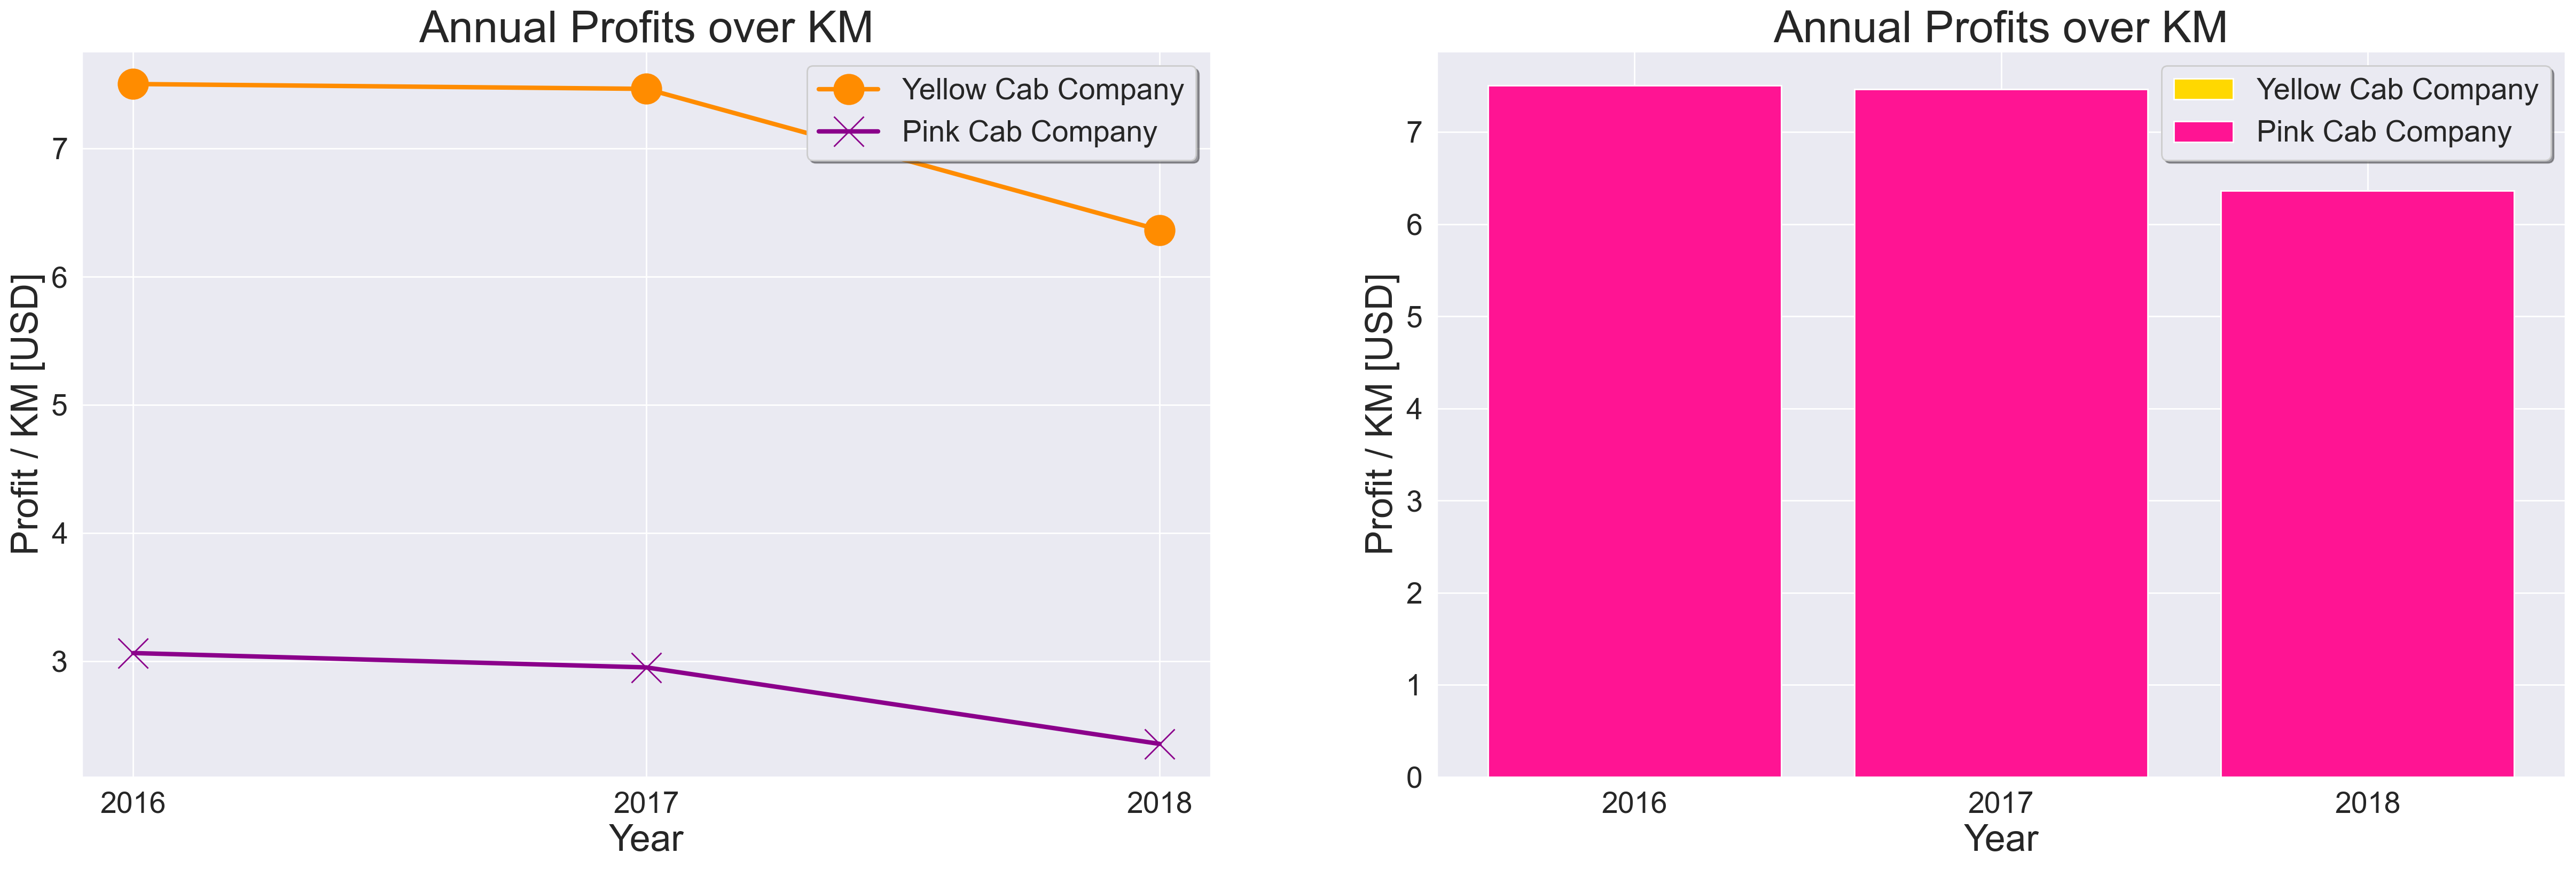

In [116]:
plt.figure(figsize=(30,9), dpi = 200)

plt.subplot(1,2,2)
x1= yellow_yearly.ProfitOKM.resample('Y').sum()
x2= pink_yearly.ProfitOKM.resample('Y').sum()

plt.bar(x= x1.index.strftime('%Y'), height='ProfitOKM', data =yellow_yearly,
        color = '#FFD801',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitOKM', data = yellow_yearly, 
        color = '#FF1493',label='Pink Cab Company')

plt.title('Annual Profits over KM',fontsize=30)
plt.ylabel('Profit / KM [USD]',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.legend(loc='upper right', shadow=True,fontsize=20)

plt.subplot(1,2,1)
x1= yellow_yearly.ProfitOKM.resample('Y').sum()
x2= pink_yearly.ProfitOKM.resample('Y').sum()

plt.plot(x1.index.strftime('%Y'),'ProfitOKM', data = yellow_yearly,
         color = '#FF8C00',label='Yellow Cab Company',linewidth=3,marker='o', ms = 20)
plt.plot(x2.index.strftime('%Y'),'ProfitOKM', data = pink_yearly, 
         color = '#8B008B',label='Pink Cab Company',linewidth=3,marker='x', ms = 20)

plt.title('Annual Profits over KM',fontsize=30)
plt.ylabel('Profit / KM [USD]',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.legend(loc='upper right', shadow=True,fontsize=20)

Profit per Km decreases over time in both companies.

#### Monthly profit over KM

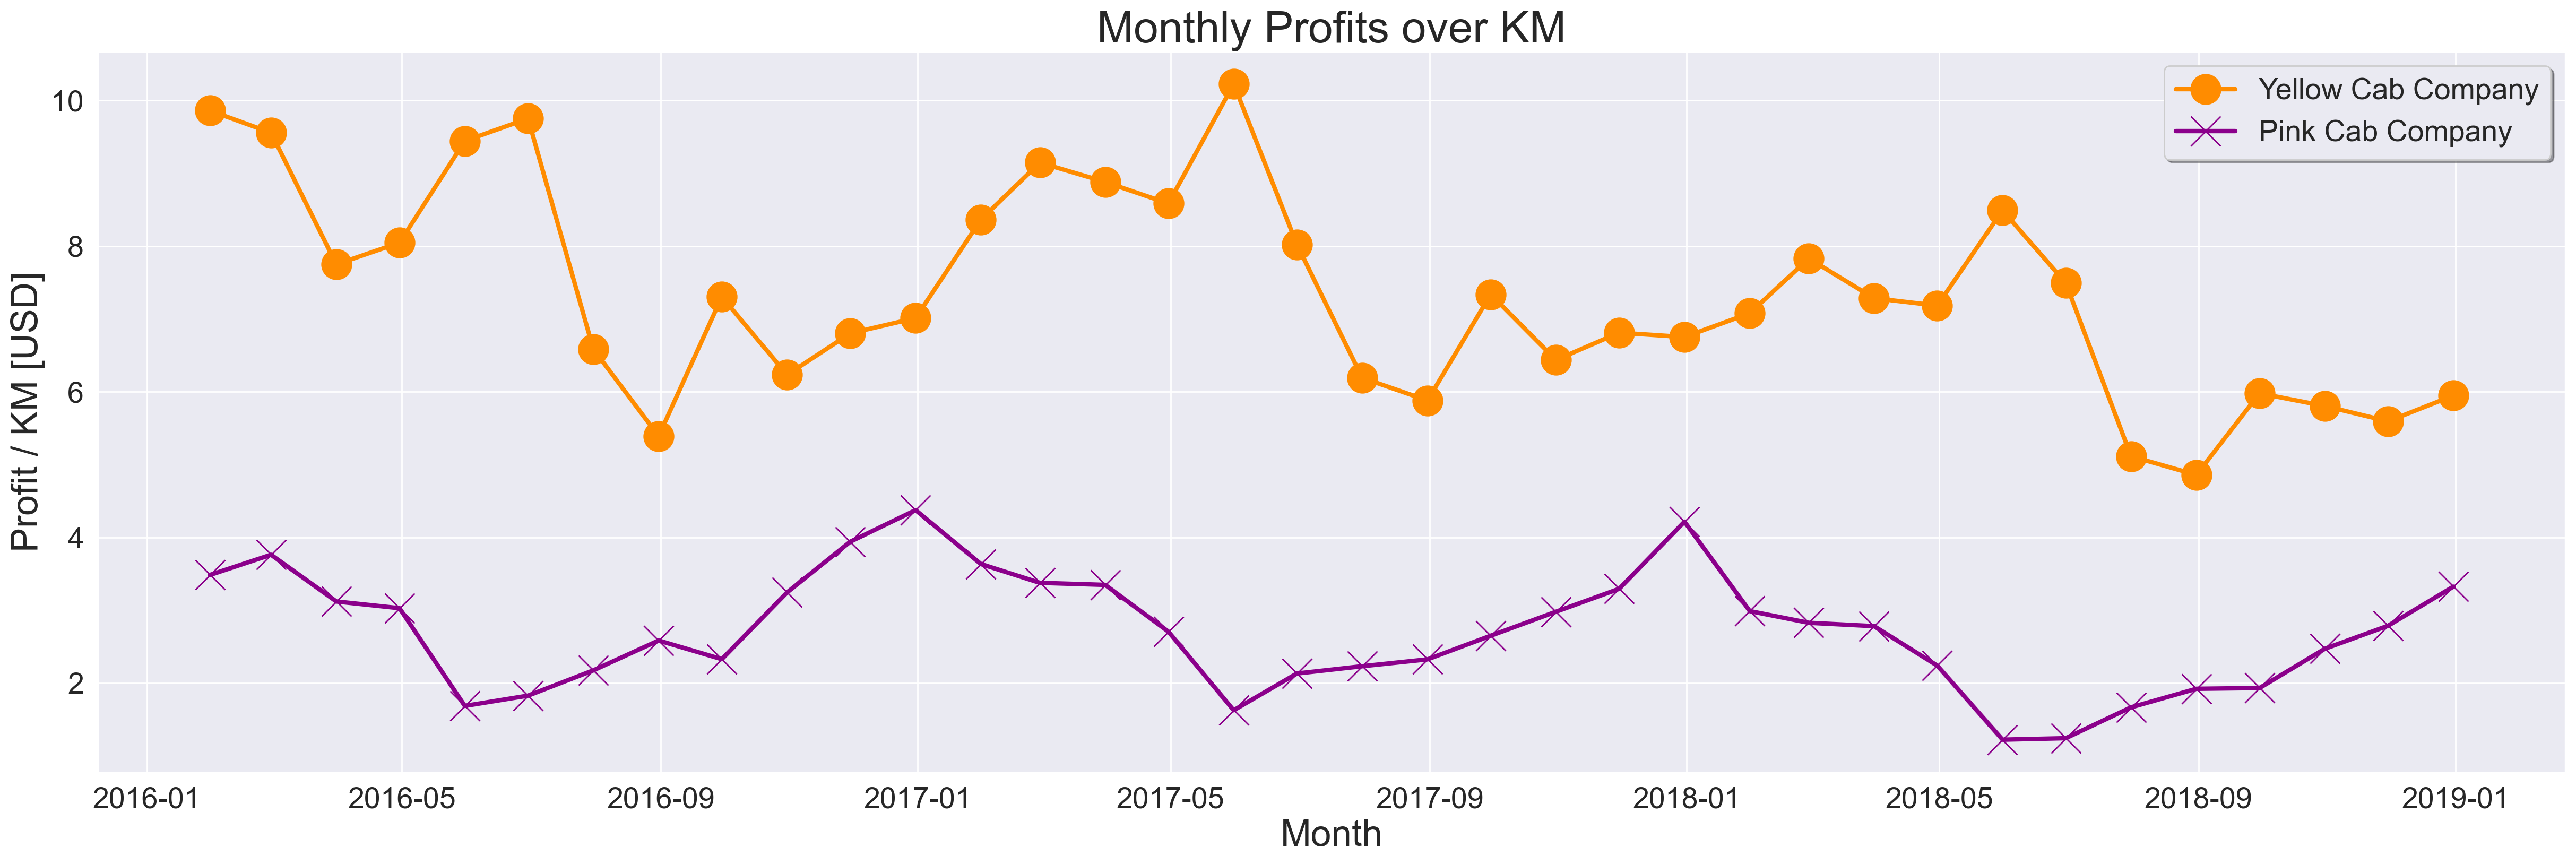

In [115]:
plt.figure(figsize=(30,9), dpi = 200)

x1= yellow_monthly.ProfitOKM.resample('m').sum()
x2= pink_monthly.ProfitOKM.resample('m').sum()
plt.ylabel('Profit / KM [USD]', fontsize=25)

plt.plot(x1.index,'ProfitOKM', data = yellow_monthly,
         color = '#FF8C00',label='Yellow Cab Company',linewidth=3, marker='o', ms = 20)
plt.plot(x2.index,'ProfitOKM', data = pink_monthly, 
         color = '#8B008B',label='Pink Cab Company',linewidth=3,marker='x', ms = 20)

plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.title('Monthly Profits over KM',fontsize=30)
plt.ylabel('Profit / KM [USD]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.legend(loc='upper right', shadow=True,fontsize=20)

'Profit per Km' in Yellow cab company is higher than Pink cab company for each and every month.

### Average profits per City

Text(0.5, 1.0, 'Yellow Cab Profits over City')

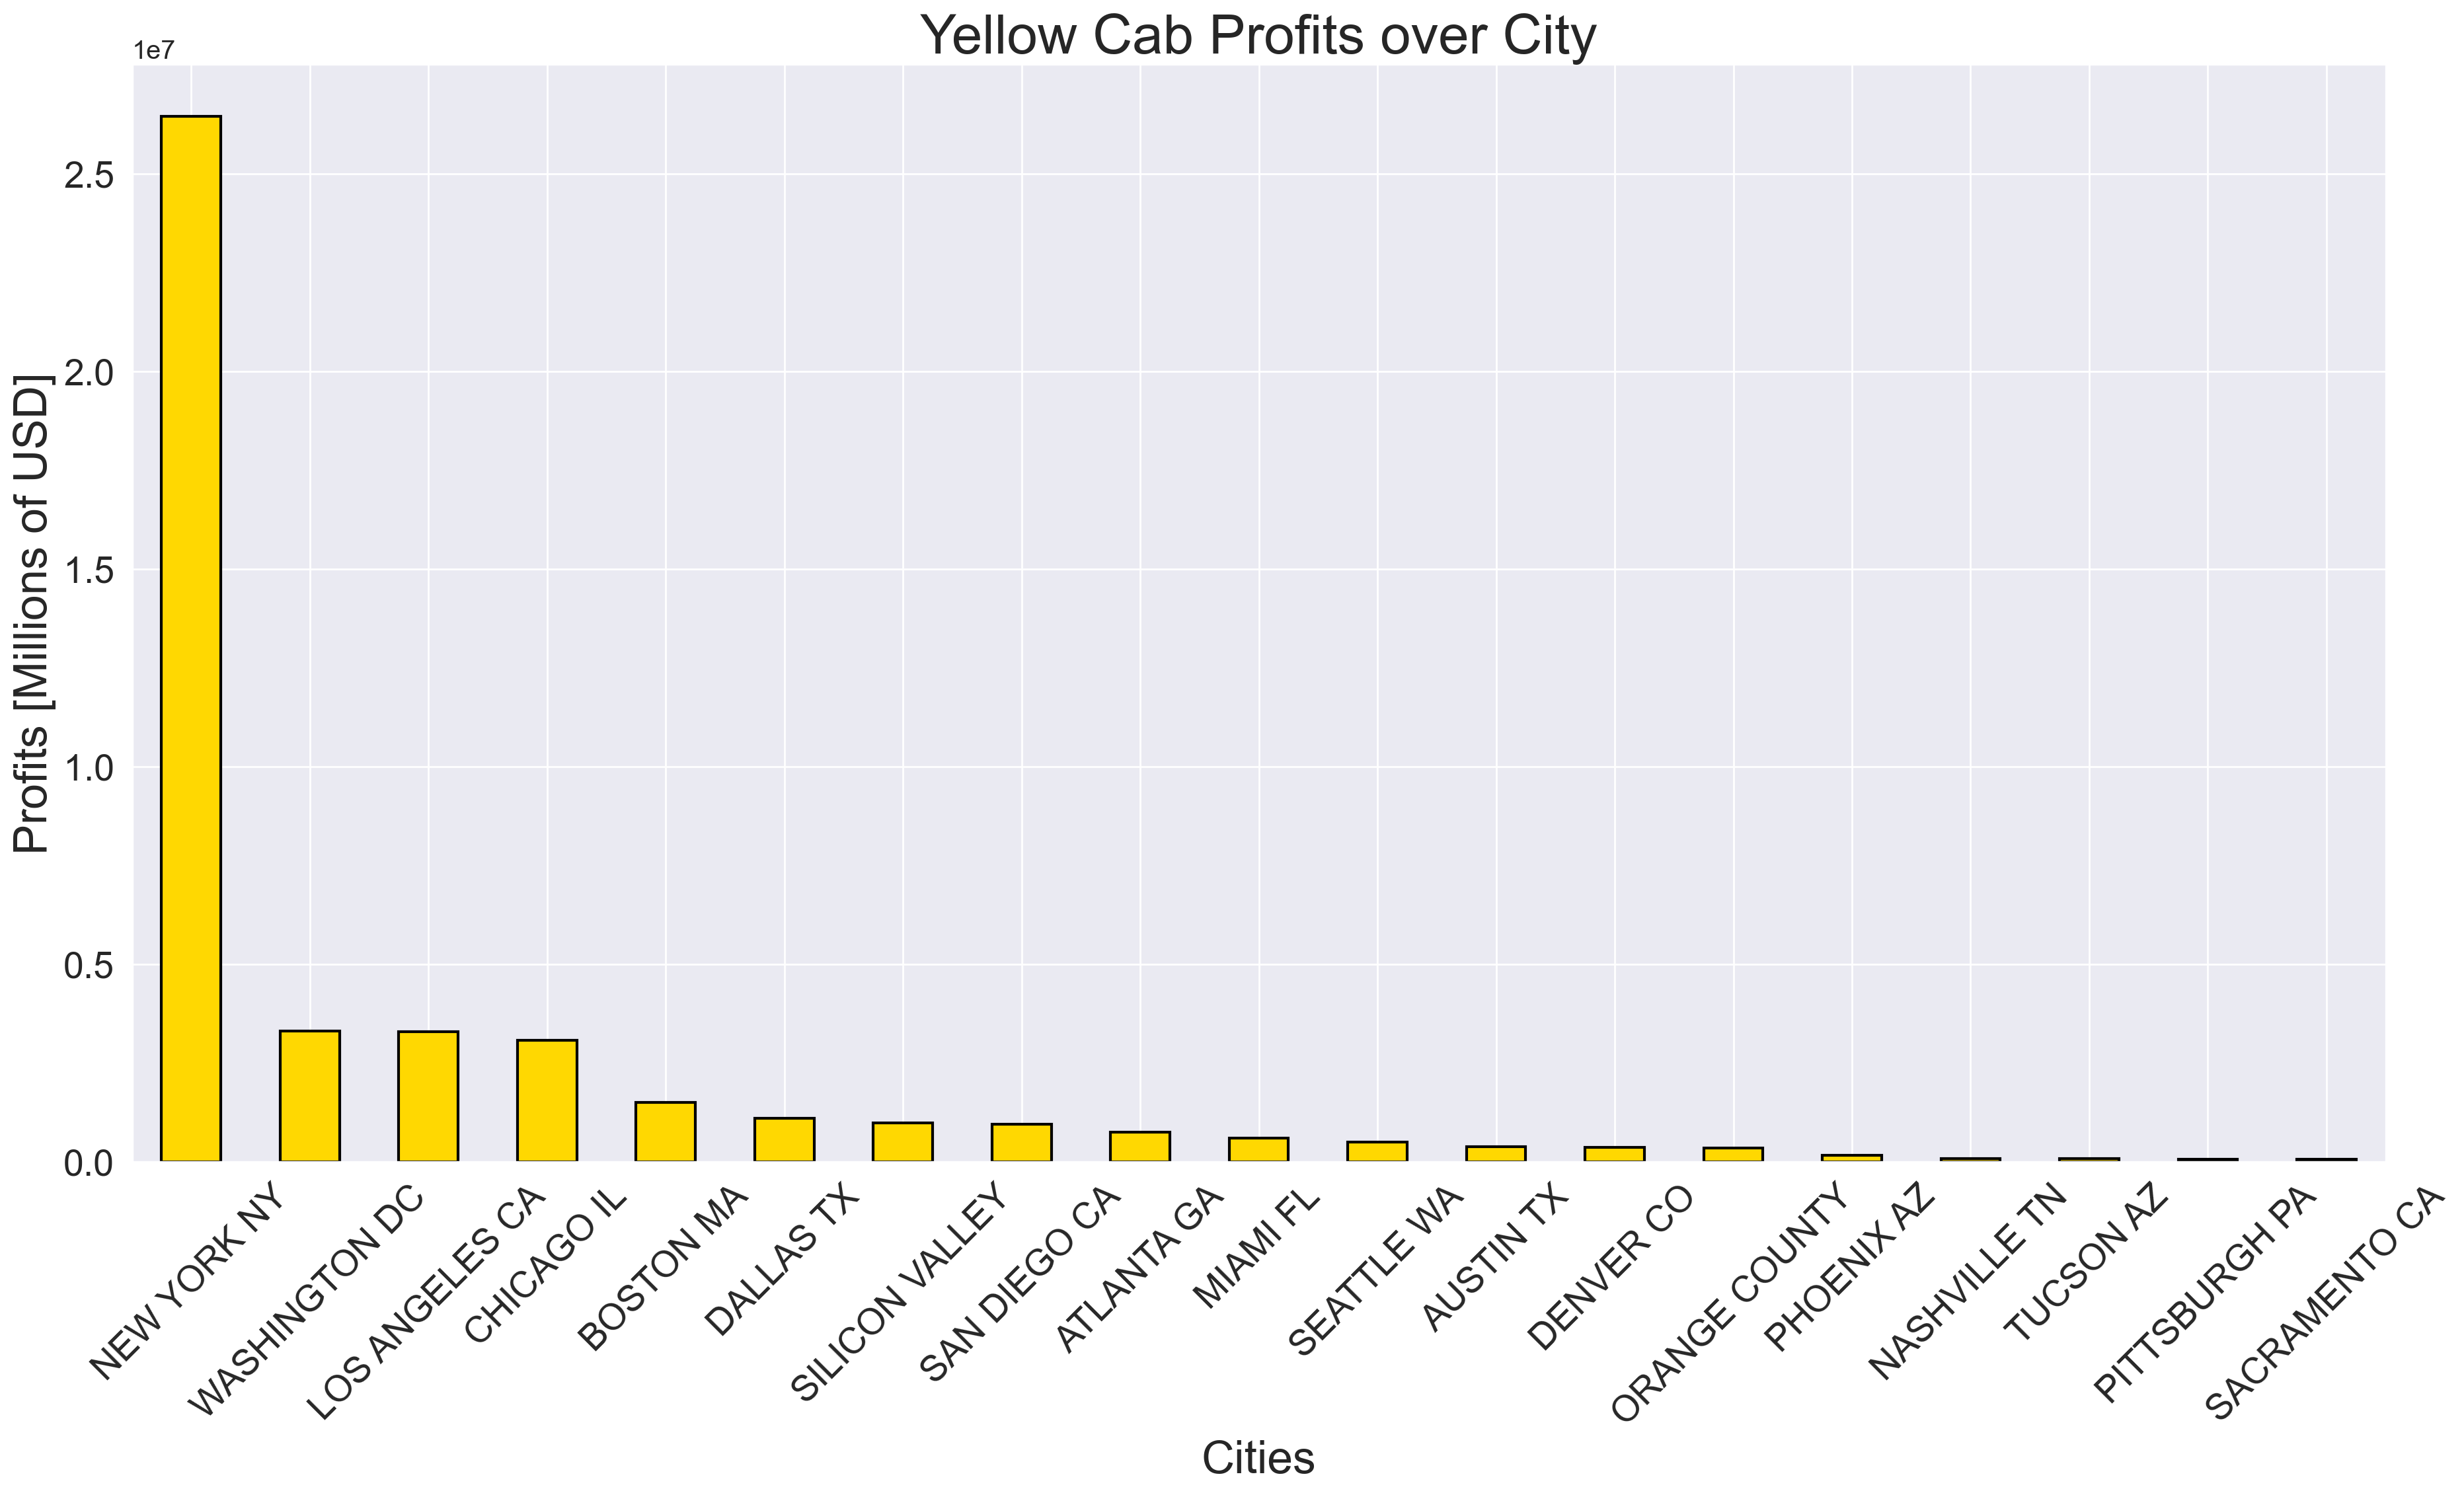

In [84]:
yellow_city = yellow_cab.groupby('City').Profit.sum()
yellow_city= pd.DataFrame(yellow_city)
yellow_city = yellow_city.sort_values(by='Profit', ascending= False )
yellow_city.head()

plt.figure(figsize=(22,11), dpi = 200)
fig = yellow_city.Profit.plot.bar(color = '#FFD801',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Yellow Cab Profits over City',fontsize=30)
#add_value_labels(fig)

Text(0.5, 1.0, 'Pink Cab Profits over City')

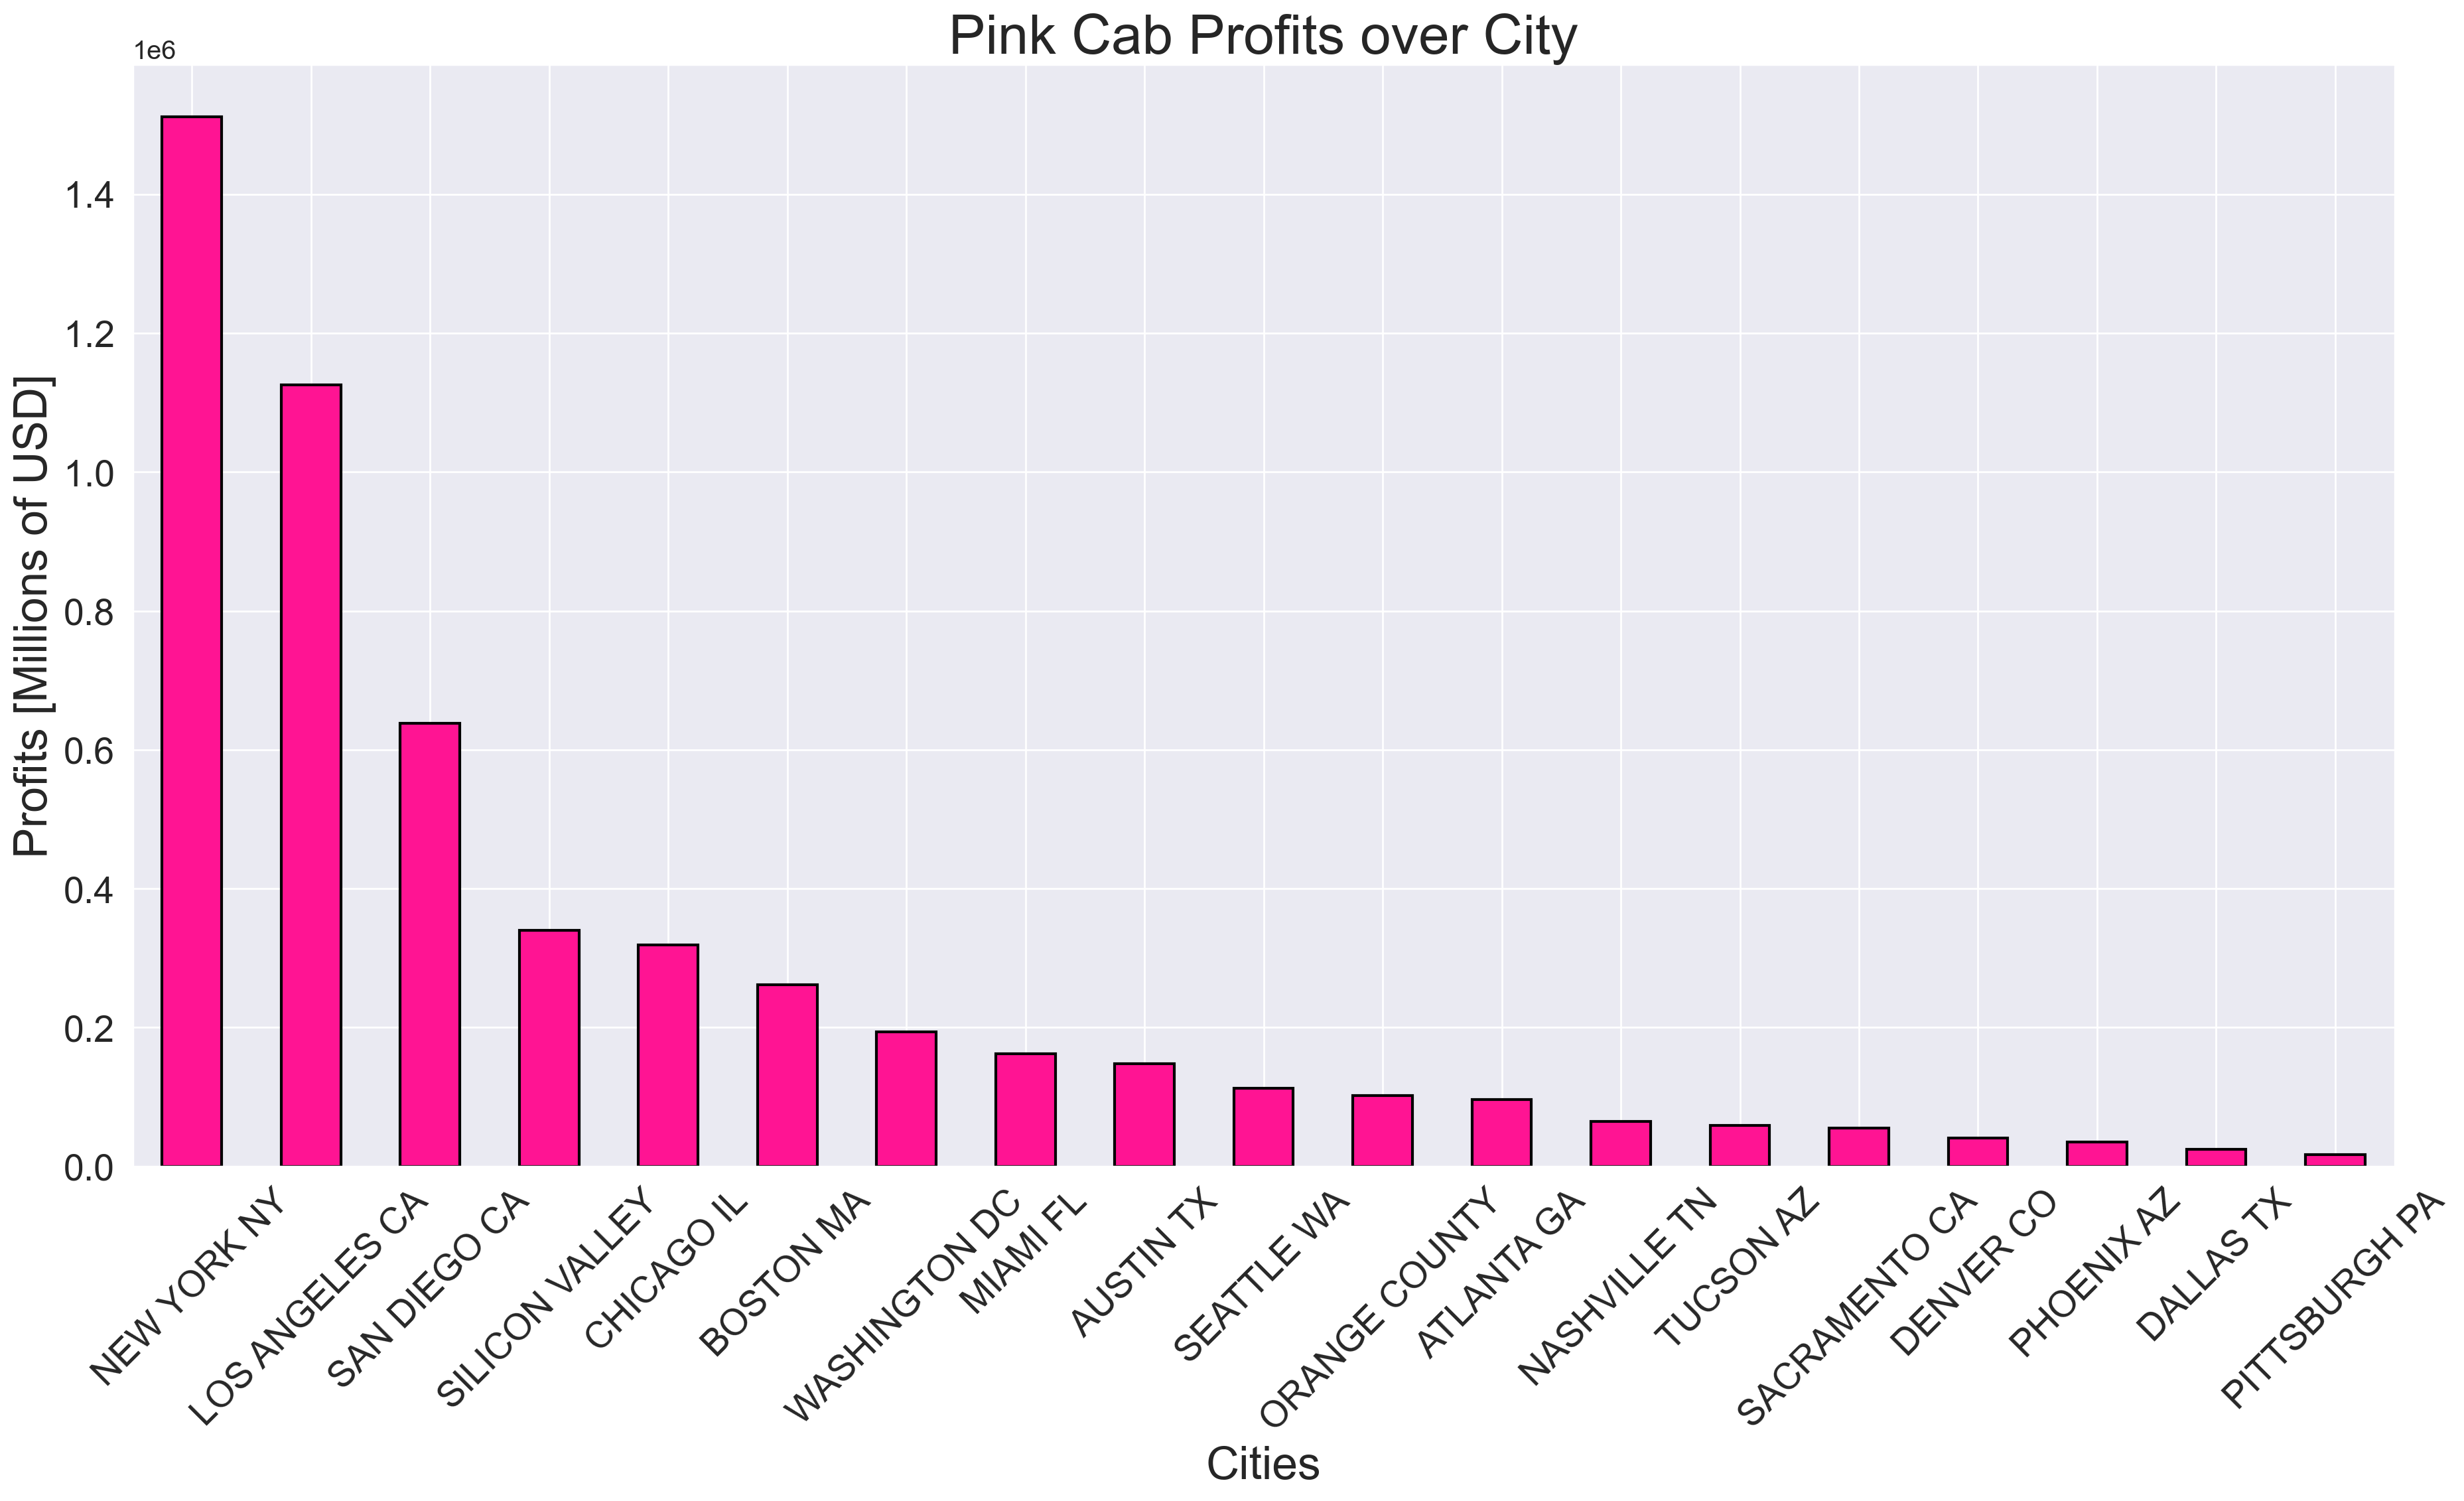

In [85]:
pink_city = pink_cab.groupby('City').Profit.sum()
pink_city= pd.DataFrame(pink_city)
pink_city = pink_city.sort_values(by='Profit', ascending= False )
pink_city.head()

plt.figure(figsize=(22,11),dpi = 200)
fig= pink_city.Profit.plot.bar(color = '#FF1493',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Pink Cab Profits over City',fontsize=30)
#add_value_labels(fig)

#### Citywise profitable rides (percentage) 

In [86]:
yellow_rides = pd.DataFrame(yellow_cab['City'])
yellow_rides['is_profitable'] = pd.DataFrame(yellow_cab['Profit']>0)
yellow_rides = yellow_rides.groupby(['City','is_profitable']).size().to_frame()
yellow_rides = yellow_rides.rename(columns = {0:'count'})
yellow_rides = yellow_rides.pivot_table('count', ['City'], 'is_profitable')

yellow_rides = yellow_rides.fillna(0)

yellow_rides['profitability_%'] = round(((yellow_rides[True]/(yellow_rides[True]+yellow_rides[False]))*100),2)
yellow_rides = yellow_rides.reset_index(level='City', col_level=1)
yellow_rides = yellow_rides.rename_axis(None, axis=1)
yellow_rides = yellow_rides.sort_values(by='profitability_%', ascending= False)


yellow_rides

City   False     True  profitability_%
9      NEW YORK NY     0.0  85918.0           100.00
16  SILICON VALLEY     0.0   4722.0           100.00
4        DALLAS TX     1.0   5636.0            99.98
5        DENVER CO    31.0   2400.0            98.72
7         MIAMI FL    65.0   4387.0            98.54
0       ATLANTA GA    86.0   5709.0            98.52
6   LOS ANGELES CA   663.0  27505.0            97.65
11      PHOENIX AZ    30.0   1170.0            97.50
10   ORANGE COUNTY    63.0   2406.0            97.45
1        AUSTIN TX    91.0   2937.0            96.99
14    SAN DIEGO CA   342.0   9474.0            96.52
15      SEATTLE WA   252.0   5013.0            95.21
18   WASHINGTON DC  2773.0  37272.0            93.08
12   PITTSBURGH PA    67.0    564.0            89.38
3       CHICAGO IL  5693.0  41571.0            87.95
8     NASHVILLE TN   143.0   1026.0            87.77
2        BOSTON MA  3014.0  21492.0            87.70
17       TUCSON AZ   169.0    963.0            85.07
13   SACRAMENTO CA   209.0    824.0            79.77

In [90]:
yellow_rides_i = yellow_rides.set_index('City')
yellow_rides_i

False     True  profitability_%
City                                            
NEW YORK NY        0.0  85918.0           100.00
SILICON VALLEY     0.0   4722.0           100.00
DALLAS TX          1.0   5636.0            99.98
DENVER CO         31.0   2400.0            98.72
MIAMI FL          65.0   4387.0            98.54
ATLANTA GA        86.0   5709.0            98.52
LOS ANGELES CA   663.0  27505.0            97.65
PHOENIX AZ        30.0   1170.0            97.50
ORANGE COUNTY     63.0   2406.0            97.45
AUSTIN TX         91.0   2937.0            96.99
SAN DIEGO CA     342.0   9474.0            96.52
SEATTLE WA       252.0   5013.0            95.21
WASHINGTON DC   2773.0  37272.0            93.08
PITTSBURGH PA     67.0    564.0            89.38
CHICAGO IL      5693.0  41571.0            87.95
NASHVILLE TN     143.0   1026.0            87.77
BOSTON MA       3014.0  21492.0            87.70
TUCSON AZ        169.0    963.0            85.07
SACRAMENTO CA    209.0    824.0            79.77

In [91]:
pink_rides = pd.DataFrame(pink_cab['City'])
pink_rides['is_profitable'] = pd.DataFrame(pink_cab['Profit']>0)
pink_rides = pink_rides.groupby(['City','is_profitable']).size().to_frame()
pink_rides = pink_rides.rename(columns = {0:'count'})
pink_rides = pink_rides.pivot_table('count', ['City'], 'is_profitable')

pink_rides = pink_rides.fillna(0)
pink_rides['profitability_%'] = round(((pink_rides[True]/(pink_rides[True]+pink_rides[False]))*100),2)
pink_rides = pink_rides.reset_index(level='City', col_level=1)
pink_rides = pink_rides.rename_axis(None, axis=1)
pink_rides = pink_rides.sort_values(by='profitability_%', ascending= False )


pink_rides

City  False   True  profitability_%
16  SILICON VALLEY    117   3680            96.92
9      NEW YORK NY    454  13513            96.75
1        AUSTIN TX    149   1719            92.02
14    SAN DIEGO CA    923   9749            91.35
10   ORANGE COUNTY    167   1346            88.96
18   WASHINGTON DC    429   3263            88.38
6   LOS ANGELES CA   2365  17500            88.09
17       TUCSON AZ    108    691            86.48
7         MIAMI FL    273   1729            86.36
2        BOSTON MA    734   4452            85.85
0       ATLANTA GA    277   1485            84.28
15      SEATTLE WA    574   2158            78.99
13   SACRAMENTO CA    308   1026            76.91
3       CHICAGO IL   2206   7155            76.43
11      PHOENIX AZ    219    645            74.65
8     NASHVILLE TN    550   1291            70.12
5        DENVER CO    468    926            66.43
4        DALLAS TX    541    839            60.80
12   PITTSBURGH PA    269    413            60.56

In [92]:
pink_rides_i = pink_rides.set_index('City')
pink_rides_i

False   True  profitability_%
City                                         
SILICON VALLEY    117   3680            96.92
NEW YORK NY       454  13513            96.75
AUSTIN TX         149   1719            92.02
SAN DIEGO CA      923   9749            91.35
ORANGE COUNTY     167   1346            88.96
WASHINGTON DC     429   3263            88.38
LOS ANGELES CA   2365  17500            88.09
TUCSON AZ         108    691            86.48
MIAMI FL          273   1729            86.36
BOSTON MA         734   4452            85.85
ATLANTA GA        277   1485            84.28
SEATTLE WA        574   2158            78.99
SACRAMENTO CA     308   1026            76.91
CHICAGO IL       2206   7155            76.43
PHOENIX AZ        219    645            74.65
NASHVILLE TN      550   1291            70.12
DENVER CO         468    926            66.43
DALLAS TX         541    839            60.80
PITTSBURGH PA     269    413            60.56

Text(0.5, 0, 'Cities')

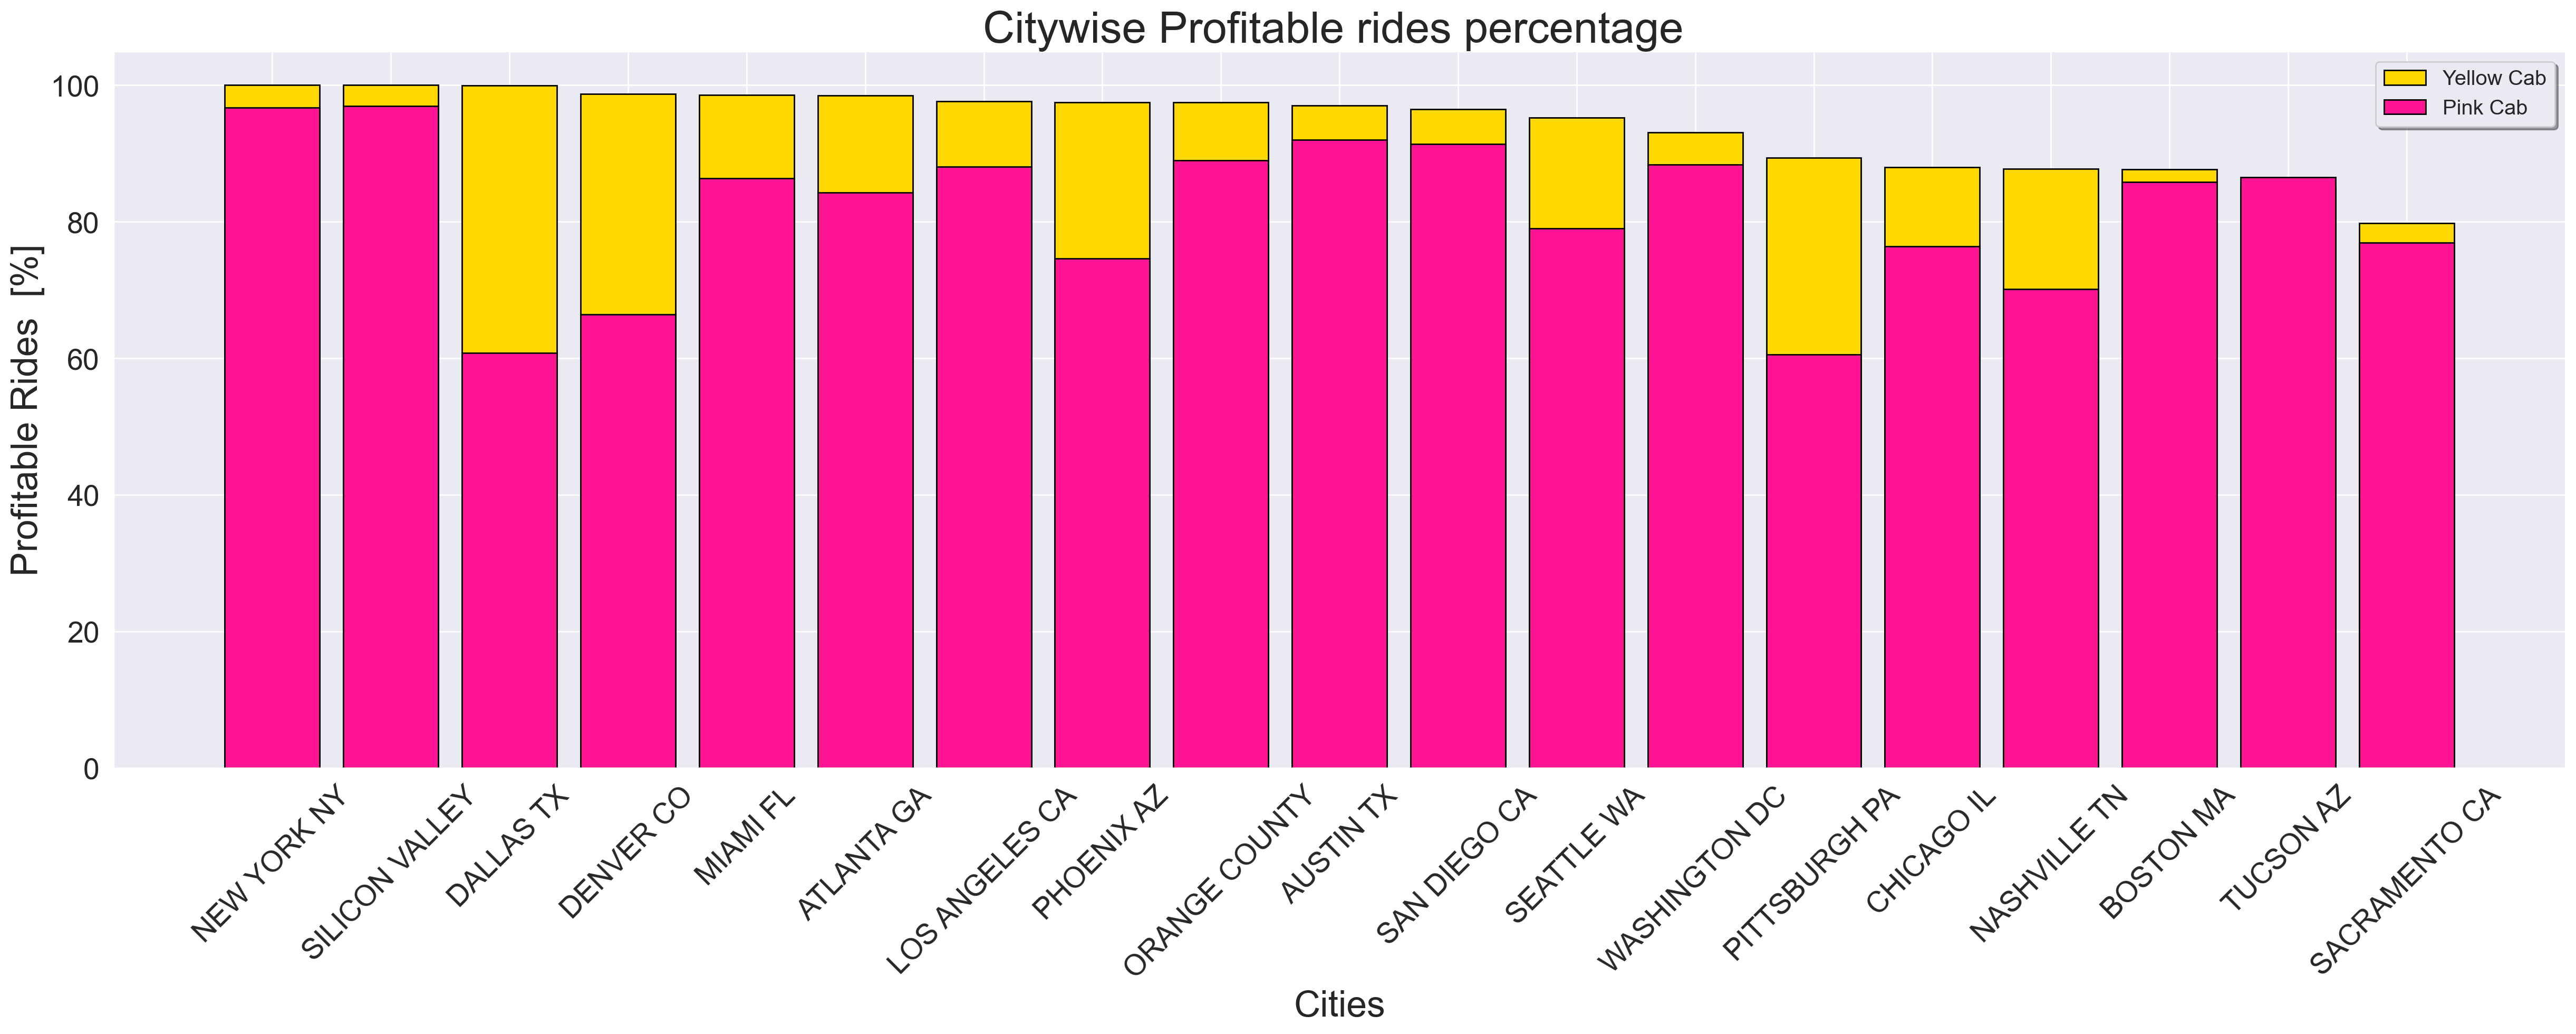

In [93]:
plt.figure(figsize=(30,9), dpi = 200)

plt.bar(x= yellow_rides_i.index, height='profitability_%', data = yellow_rides_i,
        edgecolor = 'black',color = '#FFD801',linewidth=1,label='Yellow Cab')
plt.bar(x= pink_rides_i.index, height='profitability_%', data = pink_rides_i,
        edgecolor = 'black',color = '#FF1493',linewidth=1,label='Pink Cab')

plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.ylabel('Profitable Rides  [%]', fontsize=25)
plt.title('Citywise Profitable rides percentage ', fontsize = 30)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=25)

Now, we can answer the second hypothesis. For that, let's assume that if the profitability percentage of rides per city is higher than 80%, it will perform well.<br>
Then we can say that:<br>
<br>
profitability percentage of rides change by cities and Yellow Cab has a high performance acording to the analysis by mantaining a high level of profitable rides in every City.




<a id="6"></a> <br>
## 6. Demand Analysis

### Demand

#### Yearly Demand

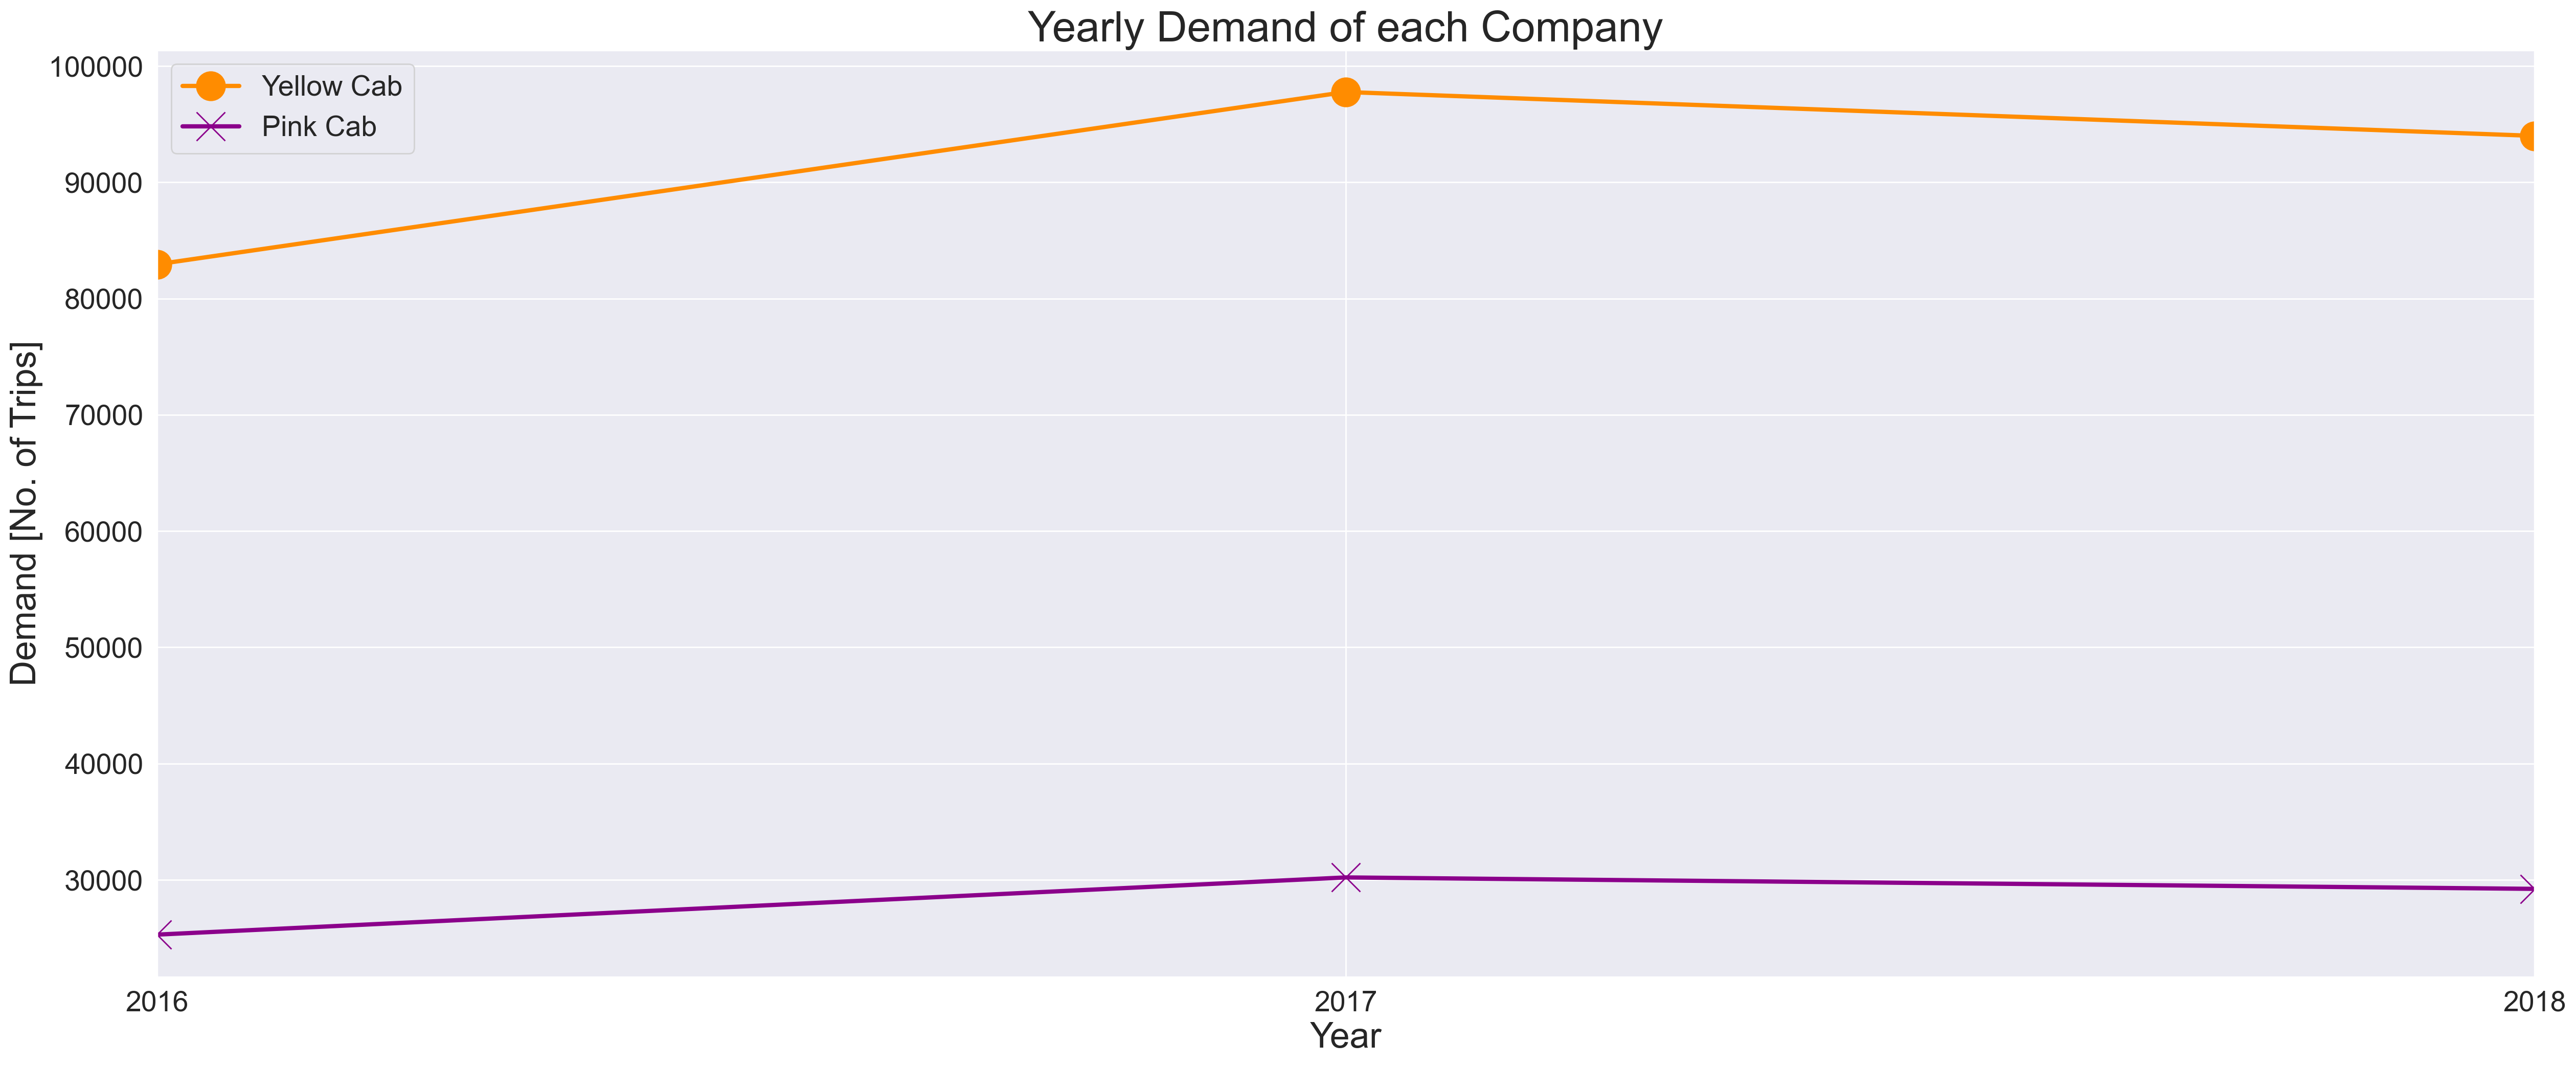

In [114]:
plt.figure(figsize=(30,12), dpi = 200)

yellow_cab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = '#FF8C00',linewidth =3,marker='o', ms=20)
pink_cab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = '#8B008B',linewidth =3,marker='x',ms=20)

plt.legend(['Yellow Cab', 'Pink Cab'],fontsize=20)
plt.title('Yearly Demand of each Company',fontsize=30)
plt.ylabel('Demand [No. of Trips]',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.show()

Yearly demand of Yellow cab company is maintained nearly 4 times greater than the demand of Pink cab company. 

#### Monthly Demand

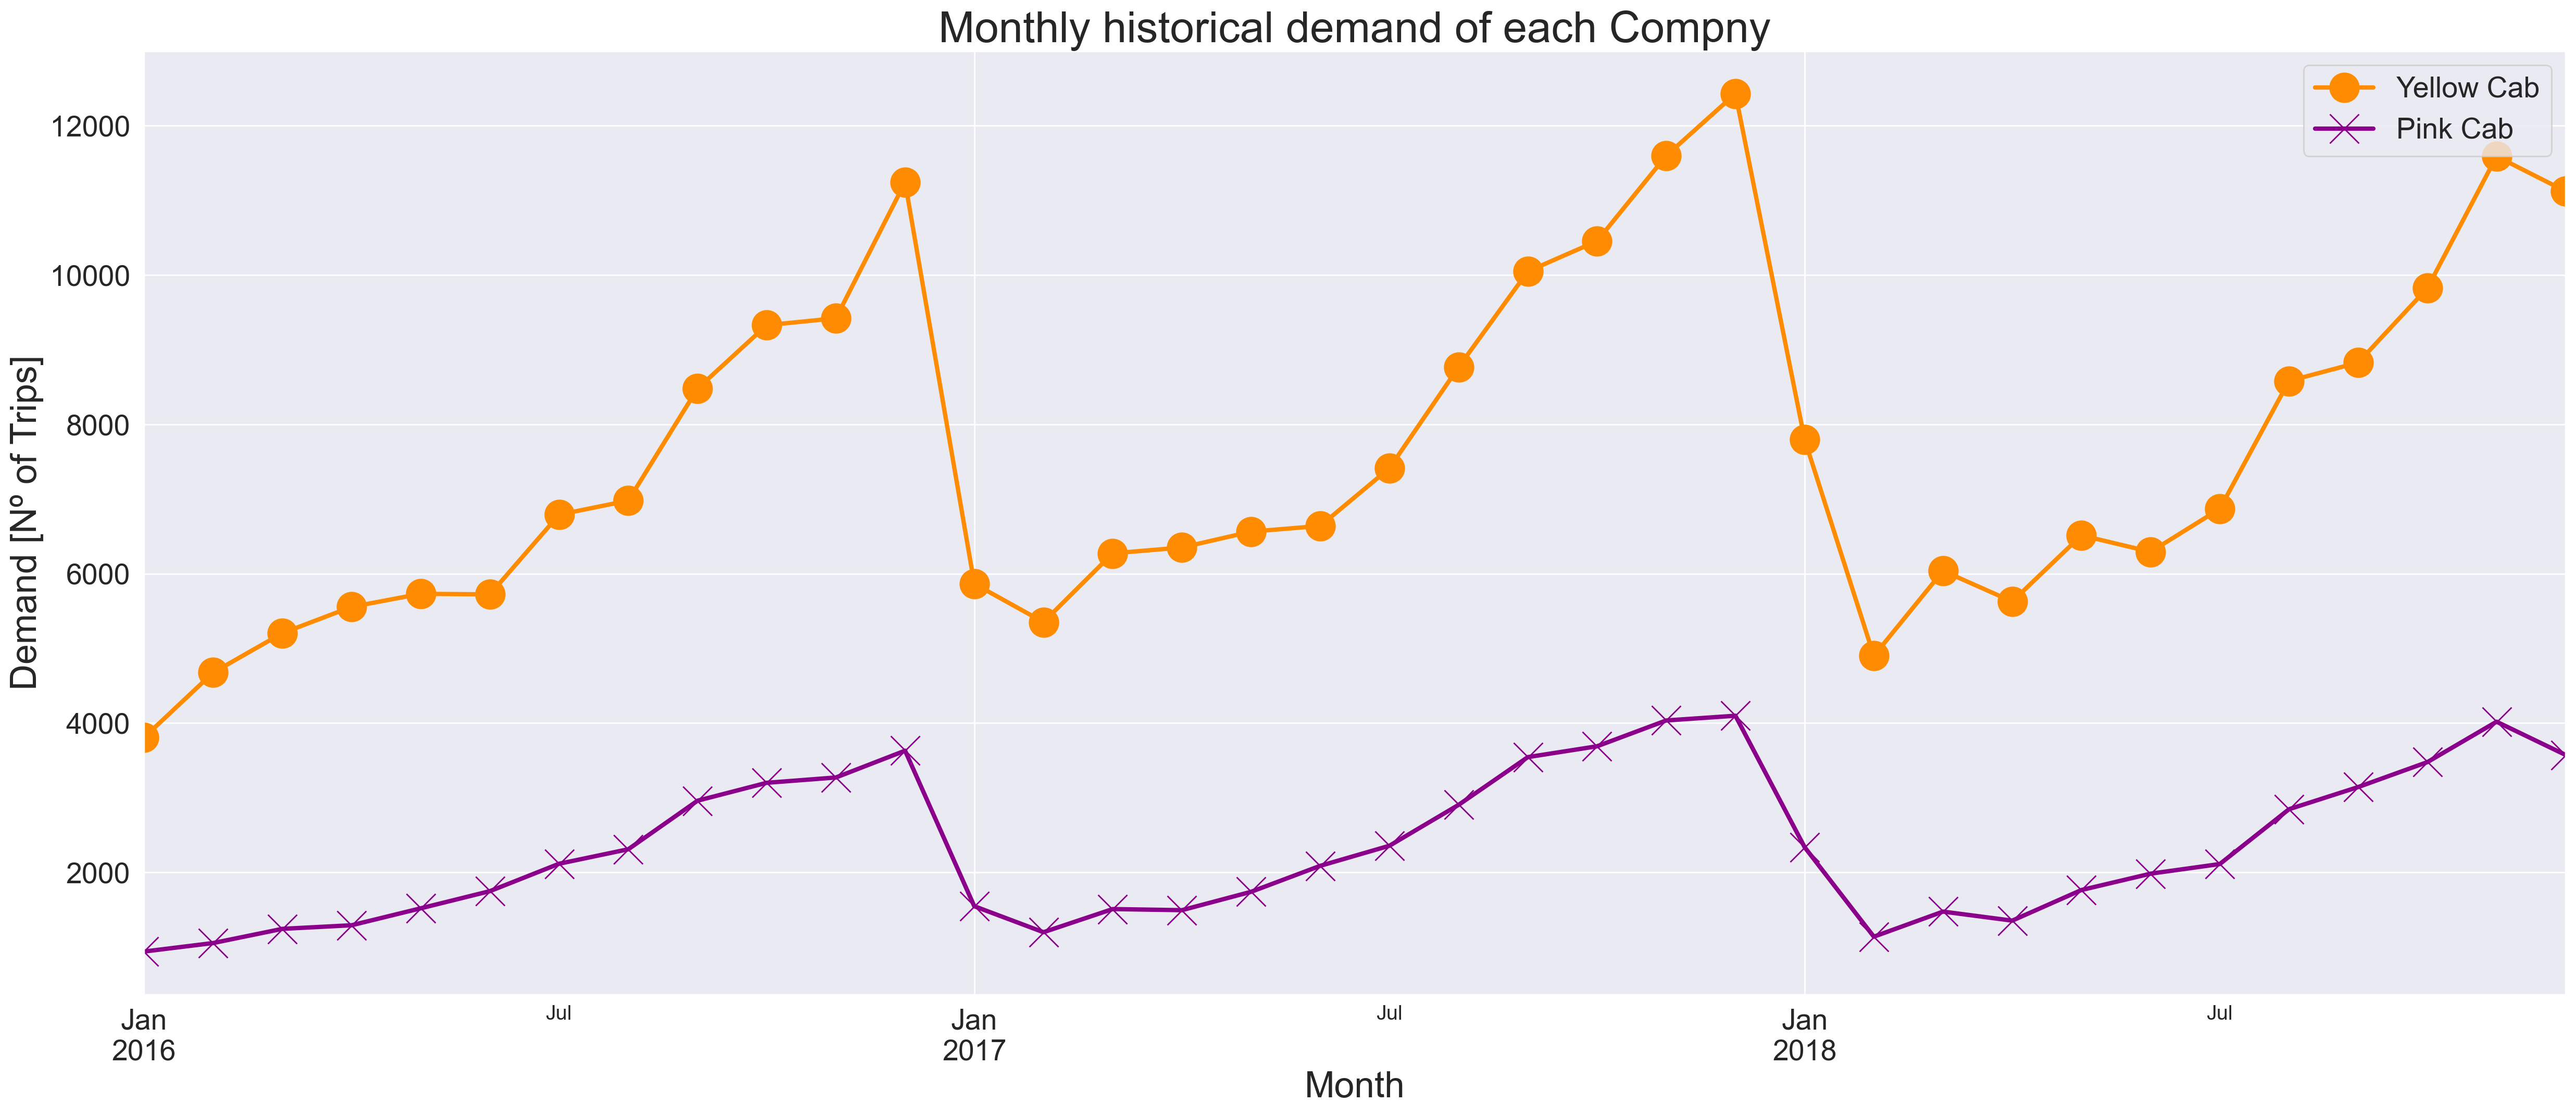

In [112]:
plt.figure(figsize=(30,12), dpi = 200)

yellow_cab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = '#FF8C00',label='Yellow Cab Company',linewidth=3, marker='o', ms=20)
pink_cab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = '#8B008B',label='Pink Cab Company',linewidth=3,marker='x', ms=20)

plt.legend(['Yellow Cab', 'Pink Cab'],fontsize=20)
plt.title('Monthly historical demand of each Compny',fontsize=30)
plt.ylabel('Demand [Nº of Trips]',fontsize=25)
plt.xlabel('Month',fontsize=25)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

There is a seasonality of demand changing throughout the year.

### Demand Agewise

In [101]:
age_group_1 = master_df[(master_df['Age']>18) & (master_df['Age']<25)]
age_group_2 = master_df[(master_df['Age']>26) & (master_df['Age']<40)]
age_group_3 = master_df[(master_df['Age']>41) & (master_df['Age']<60)]
age_group_4 = master_df[(master_df['Age']>60)]

group_1 = age_group_1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
group_1.columns=['Total Customers']
group_1 = group_1.reset_index(level='Year of Travel', col_level=1)
group_1 = group_1.reset_index(level='Company', col_level=1)
group_1['Class'] = '18-25'

group_2 = age_group_2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
group_2.columns=['Total Customers']
group_2 = group_2.reset_index(level='Year of Travel', col_level=1)
group_2 = group_2.reset_index(level='Company', col_level=1)
group_2['Class'] = '26-40'

group_3 = age_group_3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
group_3.columns=['Total Customers']
group_3 = group_3.reset_index(level='Year of Travel', col_level=1)
group_3 = group_3.reset_index(level='Company', col_level=1)
group_3['Class'] = '40-60'

group_4 = age_group_4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
group_4.columns=['Total Customers']
group_4 = group_4.reset_index(level='Year of Travel', col_level=1)
group_4 = group_4.reset_index(level='Company', col_level=1)
group_4['Class'] = '60+'

age_group = group_1
age_group=pd.concat([age_group,group_2,group_3,group_4])
age_group['Total Customers'] = age_group['Total Customers'].astype(int)
age_group.head(5)

Company  Year of Travel  Total Customers  Class
0    Pink Cab            2016             4885  18-25
1    Pink Cab            2017             5985  18-25
2    Pink Cab            2018             5760  18-25
3  Yellow Cab            2016            16196  18-25
4  Yellow Cab            2017            19174  18-25

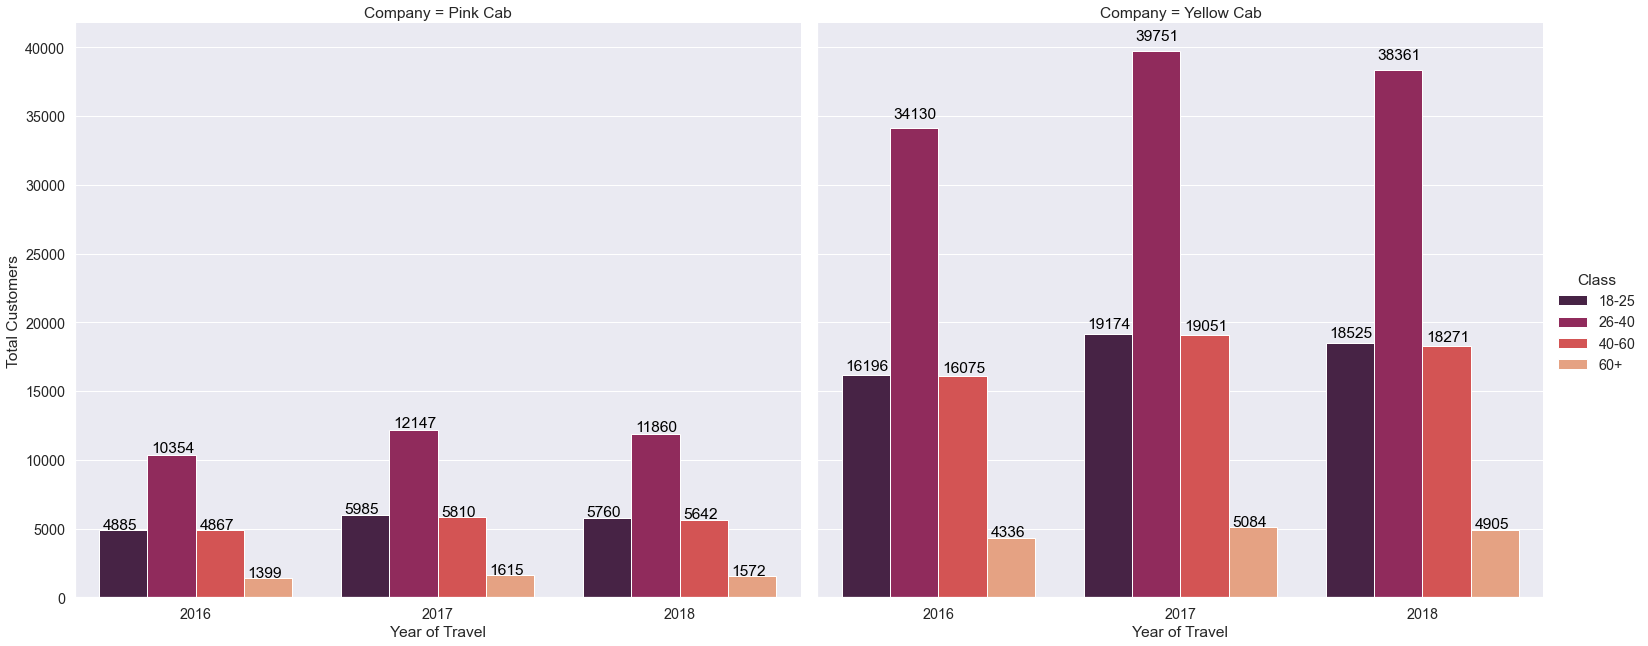

In [102]:
g=sns.catplot(x='Year of Travel',y='Total Customers',data=age_group,col= 'Company',kind='bar',hue='Class',palette = 'rocket', height=9, aspect=1.2)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.show()

Each year both companies have more customers in the age class of 20-40 years.

### Payment Mode Distribution

#### Payment Mode Distribution Yearly

In [103]:
payment_group = master_df.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
payment_group.columns = ['RidesPerYear']
payment_group = payment_group.reset_index(level='Year of Travel', col_level=1)
payment = master_df.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])

payment = payment.reset_index(level='Year of Travel', col_level=1)
payment = payment.reset_index(level='Payment_Mode', col_level=1)
payment = payment.merge(payment_group,on= 'Year of Travel')
payment.head()
payment1 = payment
payment1['per'] = payment1['count']/payment1['RidesPerYear']
payment.head()

Payment_Mode  Year of Travel  count  RidesPerYear       per
0         Card            2016  64892        108222  0.599619
1         Cash            2016  43330        108222  0.400381
2         Card            2017  76638        127964  0.598903
3         Cash            2017  51326        127964  0.401097
4         Card            2018  73974        123206  0.600409

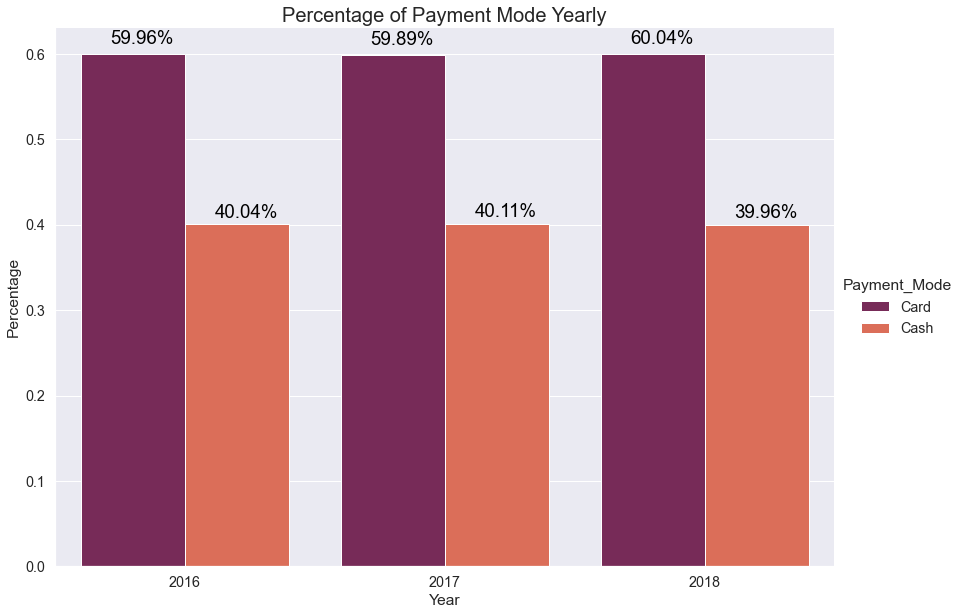

In [104]:
g=sns.catplot(x='Year of Travel',y='per',data=payment1,kind='bar',hue='Payment_Mode',palette="rocket", height=8.27, aspect=11.7/8.27)
plt.title('Percentage of Payment Mode Yearly',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')
plt.show()

Minimal deviations in the payment method are observed over time.

#### Payment Mode Distribution citywise

In [105]:
payment2 = master_df.groupby(['Year of Travel','Payment_Mode','City'])['Transaction ID'].agg(['count'])
payment2 = payment2.reset_index(level='Year of Travel', col_level=1)
payment2 = payment2.reset_index(level='Payment_Mode', col_level=1)
payment2 = payment2.reset_index(level='City', col_level=1)
payment2 = payment2.sort_values(by='count', ascending= False )
payment2.head()

City Payment_Mode  Year of Travel  count
47   NEW YORK NY         Card            2017  21541
85   NEW YORK NY         Card            2018  20286
9    NEW YORK NY         Card            2016  17923
66   NEW YORK NY         Cash            2017  14451
104  NEW YORK NY         Cash            2018  13718

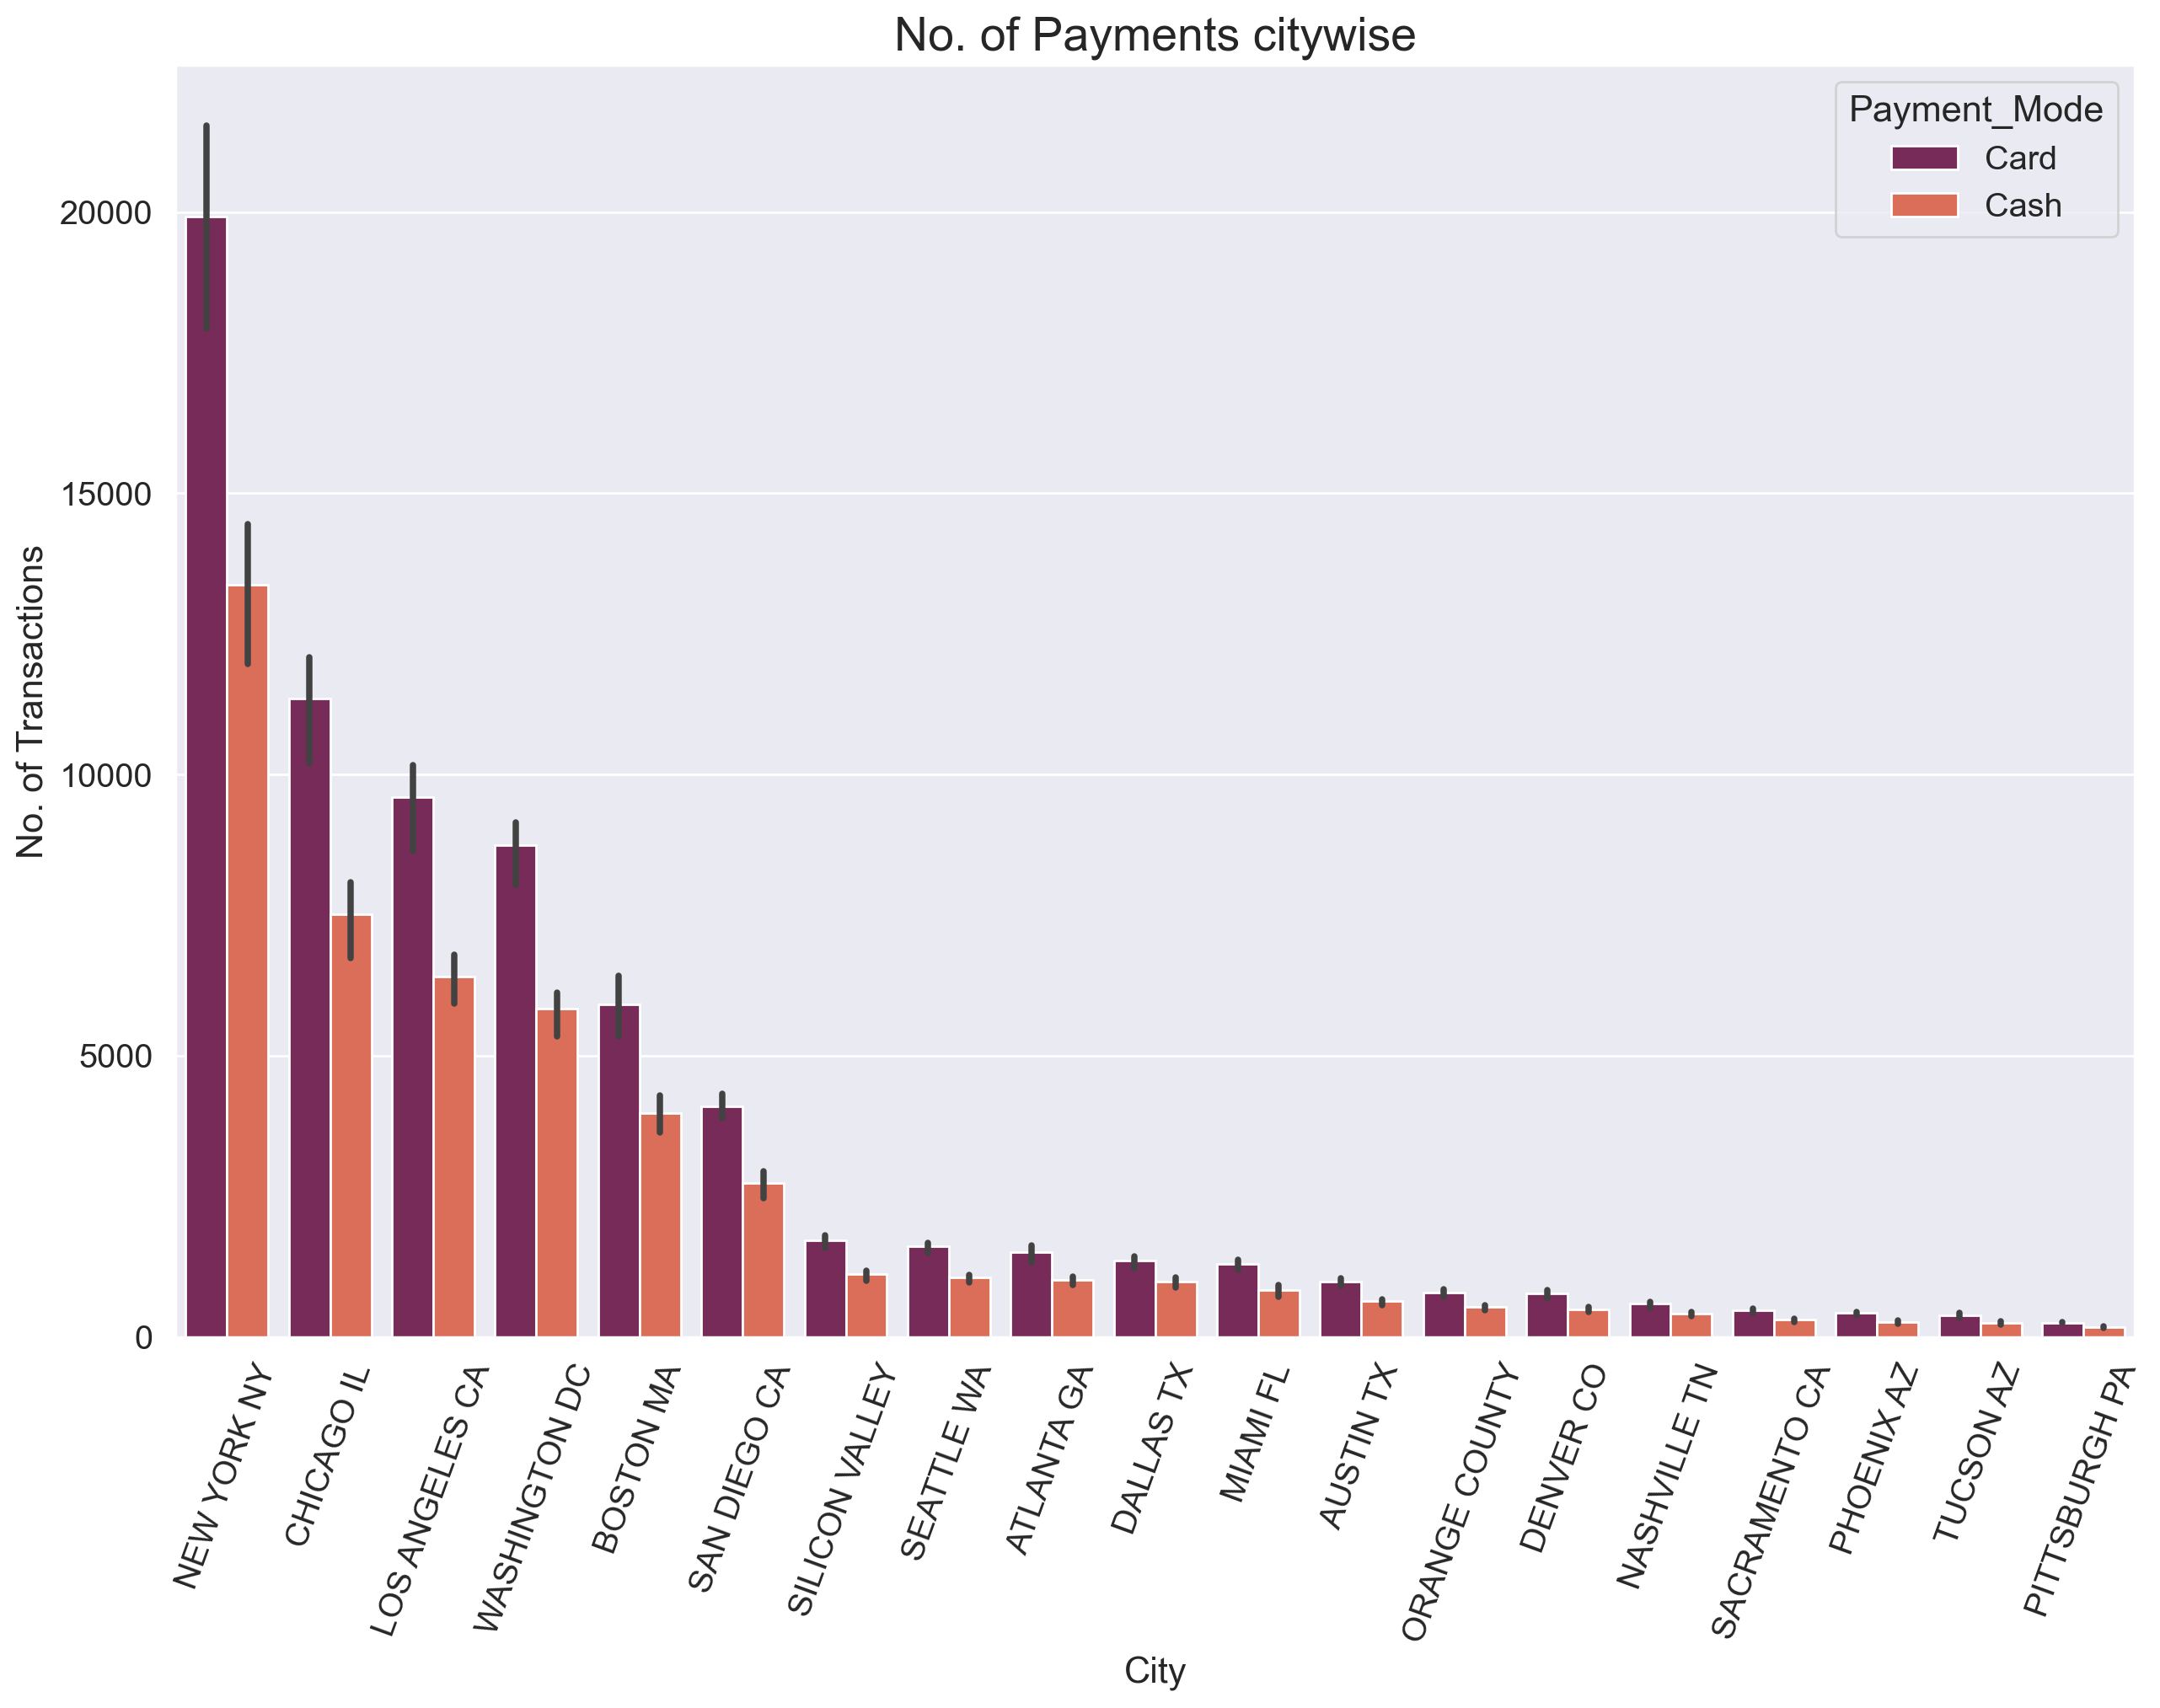

In [106]:
fig, ax = plt.subplots(figsize = (15, 10), dpi = 200)

sns.barplot(x='City',y='count',data=payment2,hue='Payment_Mode',palette="rocket")
plt.title('No. of Payments citywise',fontsize=20)
plt.xlabel('City')
plt.ylabel('No. of Transactions')
plt.xticks(rotation=70)
plt.show()

Minimal deviations of the payment method are observed in each city.

#### Payment Mode Distribution agewise

In [107]:
age_group_1 = master_df[(master_df['Age']>18) & (master_df['Age']<25)]
age_group_2 = master_df[(master_df['Age']>26) & (master_df['Age']<40)]
age_group_3 = master_df[(master_df['Age']>41) & (master_df['Age']<60)]
age_group_4 = master_df[(master_df['Age']>60)]

group_1 = age_group_1.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
group_1.columns=['cash/card']
group_1 =group_1.reset_index(level='Payment_Mode', col_level=1)
group_1['Class'] = '18-25'


group_2 = age_group_2.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
group_2.columns =['cash/card']
group_2 = group_2.reset_index(level='Payment_Mode', col_level=1)
group_2['Class']= '26-40'


group_3 = age_group_3.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
group_3 .columns=['cash/card']
group_3 = group_3 .reset_index(level='Payment_Mode', col_level=1)
group_3 ['Class']= '40-60'


group_4 = age_group_4.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
group_4.columns = ['cash/card']
group_4 = group_4.reset_index(level='Payment_Mode', col_level=1)
group_4['Class'] = '60+'

pay_age = group_1
pay_age =pd.concat([pay_age,group_2,group_3,group_4])
pay_age.head()

x=pay_age.groupby('Class').sum()
x.columns=['Total']
x=x.reset_index(level='Class', col_level=1)
x.head()

pay_age=pay_age.merge(x,on='Class')
pay_age['percentage'] = round(((pay_age['cash/card']/pay_age['Total'])*100),2)
pay_age.head()

Payment_Mode  cash/card  Class   Total  percentage
0         Card      42308  18-25   70525       59.99
1         Cash      28217  18-25   70525       40.01
2         Card      87745  26-40  146603       59.85
3         Cash      58858  26-40  146603       40.15
4         Card      41843  40-60   69716       60.02

<Figure size 3000x1800 with 0 Axes>

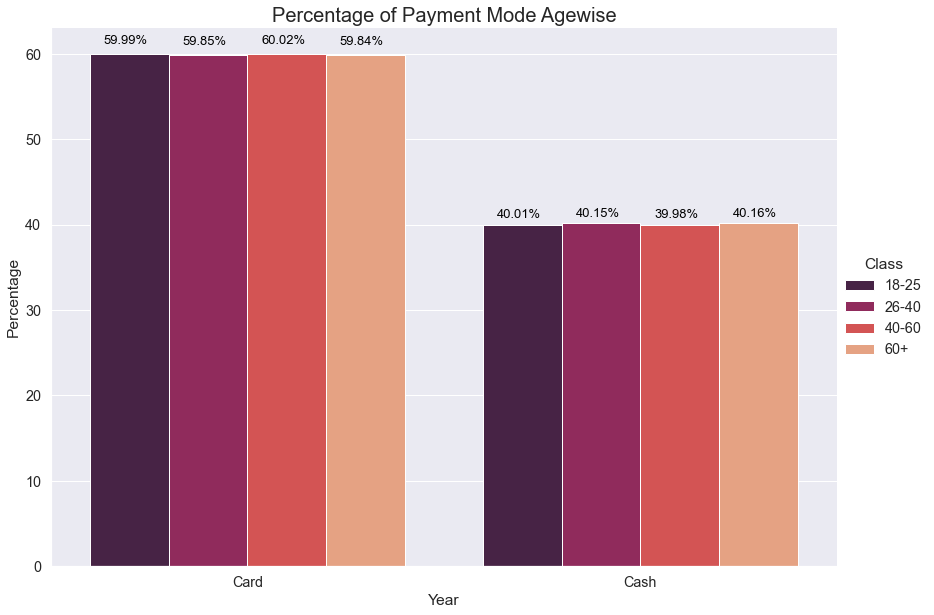

In [108]:
plt.figure(figsize=(15,9),dpi = 200)
g=sns.catplot(x='Payment_Mode',y='percentage',data=pay_age,kind='bar',hue='Class', palette='rocket', height=8.27, aspect=11.7/8.27)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.035, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title('Percentage of Payment Mode Agewise',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

Minimal deviations of the payment method are observed with respect to the age of the clients.

<a id="8"></a> <br>
## 8. Conclusion

**1. How does the profit change over time?**<br>

- Accoding to the analysis, Yellow Cab Company's earnings are more stable than Pink Cab Company's earnings.
- Profit per ride of Yellow cab company is higher than Pink cab company over three years.
- Profit per Km decreases over time in both companies.
- Profit per Km in Yellow cab company is higher than Pink cab company for each and every month.

**2. How does the percentage of profitable trips change by the city?**<br>

- Profitability percentage of rides change by cities.
- Yellow Cab has greater market share in every City.


**3. How does the demand of the cab industry change over time?**<br>

- Yearly demand of Yellow cab company is about 4 times greater than yearly demand of Pink cab company. 
- There is a seasonality of demand changing throughout the year in both cab companies.

**4. How the demand varies according to age?**<br>

- Each year both companies have more customers in the age class of 20-40 years.


**5. Fluctuations of payment methods**<br>

- Minimal deviations in the payment method are observed over time.
- Minimal deviations of the payment method are observed in each city.
- Minimal deviations of the payment method are observed with respect to the age of the clients.


### According to the overall analysis Yellow cab company is better than the Pink cab company for investing.

## Reference


https://www.kaggle.com/code/nimashaattanayake/go-to-market-insight-for-cab-investment-firm/notebook<br>